# Install and import Dependencies

## Library Lainnya

In [1]:
import os
import time
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12, 'figure.figsize': (10, 6)})

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, precision_recall_fscore_support

from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## UCI Library

In [2]:
!pip install -q ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

In [4]:
# fetch dataset
phiusiil_phishing_url_website = fetch_ucirepo(id=967)

## Kaggle API (Backup)

In [ ]:
# 1. Install library kagglehub (jika belum ada)
!pip install -q kagglehub

In [ ]:
# 3. Import & Load Dataset
import kagglehub
import glob

In [ ]:
# 2. Setup Kredensial (Ganti dengan Username & Key asli Anda)
# Username akun Kaggle Anda
os.environ['KAGGLE_USERNAME'] = "dannysatryatama"

# Key yang Anda dapatkan (KGAT_xyz...)
os.environ['KAGGLE_KEY'] = "KGAT_defe84e3b91fcc96dd88c2db266c14b2"

In [ ]:
# Download dataset PhiUSIIL terbaru
path = kagglehub.dataset_download("ndarvind/phiusiil-phishing-url-dataset")

# Cari file CSV secara otomatis
csv_files = glob.glob(f"{path}/*.csv")
if not csv_files:
    raise FileNotFoundError("File CSV tidak ditemukan di folder download Kaggle.")

file_path = csv_files[0]
print(f"Data ditemukan: {file_path}")

# Load ke Pandas DataFrame
df_raw = pd.read_csv(file_path)

Using Colab cache for faster access to the 'phiusiil-phishing-url-dataset' dataset.
Data ditemukan: /kaggle/input/phiusiil-phishing-url-dataset/PhiUSIIL_Phishing_URL_Dataset.csv


In [ ]:
class UCIDataContainer:
    def __init__(self, df, target_col='label'):
        self.features = df.drop(columns=[target_col])
        self.targets = df[[target_column]]

class MockUCIRepo:
    def __init__(self, df, target_col='label'):
        # 1. Setup Data
        self.data = UCIDataContainer(df, target_col)

        # 2. Setup Metadata Dasar
        self.metadata = {
            'uci_id': 'PhiUSIIL-Kaggle',
            'name': 'PhiUSIIL Phishing URL Dataset (High Precision Mock)',
            'num_instances': df.shape[0],
            'num_features': df.shape[1] - 1,
            'task': 'Classification',
            'has_missing_values': df.isnull().values.any()
        }

        # 3. LOGIKA OTOMATIS DETEKSI TIPE VARIABEL (INI YANG BARU)
        var_data = []

        for col in df.columns:
            # Tentukan ROLE
            role = 'Target' if col == target_col else 'Feature'

            # Tentukan TYPE secara otomatis berdasarkan isi data
            if df[col].nunique() == 2:
                # Jika isinya cuma 2 jenis angka (misal 0 dan 1), itu Binary
                var_type = 'Binary'
            elif pd.api.types.is_integer_dtype(df[col]):
                # Jika isinya angka bulat (misal panjang URL), itu Integer
                var_type = 'Integer'
            elif pd.api.types.is_float_dtype(df[col]):
                # Jika isinya desimal, itu Continuous
                var_type = 'Continuous'
            else:
                var_type = 'Categorical' # String/Object

            var_data.append({
                'name': col,
                'role': role,
                'type': var_type,
                'demographic': None,
                'description': None
            })

        self.variables = pd.DataFrame(var_data)

In [ ]:
# Tentukan nama kolom target (Di dataset PhiUSIIL namanya 'label')
target_column = 'label'

# Inisialisasi Mock Object
phiusiil_phishing_url_website = MockUCIRepo(df_raw, target_col=target_column)

# Import and load dataset

In [5]:
# data (as pandas dataframes)
X = phiusiil_phishing_url_website.data.features
y = phiusiil_phishing_url_website.data.targets

# metadata
print("\n=== METADATA DATASET ===")
print(phiusiil_phishing_url_website.metadata)

# variable information
print("\n=== VARIABLE INFORMATION ===")
print(phiusiil_phishing_url_website.variables)


=== METADATA DATASET ===
{'uci_id': 967, 'name': 'PhiUSIIL Phishing URL (Website)', 'repository_url': 'https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/967/data.csv', 'abstract': 'PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Most of the URLs we analyzed, while constructing the dataset, are the latest URLs. Features are extracted from the source code of the webpage and URL. Features such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb are derived from existing features.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 235795, 'num_features': 54, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['label'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2024, 'l

# Exploratory Data Analysis


## Detail umum

In [6]:
X_eda = X.copy()
y_eda = y.copy()
print("=== JUMLAH BARIS DATA ===")
print(f"Jumlah baris data fitur: {X_eda.shape[0]}")
print(f"Jumlah baris data target: {y_eda.shape[0]}")

=== JUMLAH BARIS DATA ===
Jumlah baris data fitur: 235795
Jumlah baris data target: 235795


In [7]:
print("=== JUMLAH FITUR (SELAIN TARGET) ===")
print(f"Jumlah fitur: {X_eda.shape[1]}")
X_eda.head(5)

=== JUMLAH FITUR (SELAIN TARGET) ===
Jumlah fitur: 54


,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,1,0,0,1,34,20,28,119,0,124
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,0,1,50,9,8,39,0,217
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,0,1,10,2,7,42,2,5
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,0,1,1,1,3,27,15,22,1,31
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,1,0,1,244,15,34,72,1,85


In [8]:
print("=== NULL / MISSING VALUES CHECK ===")
X_eda.isnull().sum()

=== NULL / MISSING VALUES CHECK ===


,0
URL,0
URLLength,0
Domain,0
DomainLength,0
IsDomainIP,0
TLD,0
URLSimilarityIndex,0
CharContinuationRate,0
TLDLegitimateProb,0
URLCharProb,0


In [9]:
print("=== JUMLAH DATA UNIQUE ===")
print(X_eda.nunique())

=== JUMLAH DATA UNIQUE ===
URL                           235370
URLLength                        482
Domain                        220086
DomainLength                     101
IsDomainIP                         2
TLD                              695
URLSimilarityIndex             36360
CharContinuationRate             898
TLDLegitimateProb                465
URLCharProb                   227421
TLDLength                         12
NoOfSubDomain                     10
HasObfuscation                     2
NoOfObfuscatedChar                20
ObfuscationRatio                 146
NoOfLettersInURL                 421
LetterRatioInURL                 709
NoOfDegitsInURL                  182
DegitRatioInURL                  575
NoOfEqualsInURL                   25
NoOfQMarkInURL                     5
NoOfAmpersandInURL                31
NoOfOtherSpecialCharsInURL        74
SpacialCharRatioInURL            240
IsHTTPS                            2
LineOfCode                     10738
LargestLine

In [10]:
print("=== JUMLAH DATA DUPLIKAT ===")
print("Jumlah duplikasi:", X_eda.duplicated().sum())

=== JUMLAH DATA DUPLIKAT ===
Jumlah duplikasi: 0


In [11]:
print("=== DISTRIBUSI TARGET ===")
# Hitung jumlah dan persentase
target_counts = y_eda.value_counts()
target_percent = y_eda.value_counts(normalize=True) * 100

# Buat dataframe tampilan
dist_df = pd.DataFrame({
    'Jumlah Sampel': target_counts,
    'Persentase (%)': target_percent.round(2)
})
display(dist_df)

# Kita ambil nilai mayoritas dan minoritas
majority = target_counts.max()
minority = target_counts.min()

# Hitung Imbalance Ratio (Mayoritas dibagi Minoritas)
imbalance_ratio = majority / minority

print(f"\nImbalance Ratio: 1 : {imbalance_ratio:.2f}")

# Threshold
# < 1.15 : Seimbang (Sangat Ideal)
# 1.15 - 1.5 : Sedikit Tidak Seimbang (Slight Imbalance)
# > 1.5 : Sangat Tidak Seimbang (Severe Imbalance)

if imbalance_ratio <= 1.15:
    print("Dataset Seimbang (Balanced)")

elif 1.15 < imbalance_ratio <= 3.0:
    print("Dataset Sedikit Tidak Seimbang (Slightly Imbalanced)")

else:
    print("Dataset Sangat Tidak Seimbang (Severely Imbalanced)")

=== DISTRIBUSI TARGET ===


,Jumlah Sampel,Persentase (%)
label,,
1,134850,57.19
0,100945,42.81



Imbalance Ratio: 1 : 1.34
Dataset Sedikit Tidak Seimbang (Slightly Imbalanced)


In [12]:
print("=== KOLOM KATEGORIKAL CHECK ===")
non_numeric_cols = X_eda.select_dtypes(include=['object']).columns.tolist()

if len(non_numeric_cols) > 0:
    print(f"Ada {len(non_numeric_cols)} kolom Kategorikal")
    print(f"{non_numeric_cols}")
else:
    print("Semua fitur sudah dalam format Numerik (Int/Float)")

=== KOLOM KATEGORIKAL CHECK ===
Ada 4 kolom Kategorikal
['URL', 'Domain', 'TLD', 'Title']


In [13]:
print("=== STATISTIK DATA NUMERIK ===")
X_eda.describe().T

=== STATISTIK DATA NUMERIK ===


,count,mean,std,min,25%,50%,75%,max
URLLength,235795.0,34.573095,41.314153,13.000000,23.000000,27.000000,34.000000,6.097000e+03
DomainLength,235795.0,21.470396,9.150793,4.000000,16.000000,20.000000,24.000000,1.100000e+02
IsDomainIP,235795.0,0.002706,0.051946,0.000000,0.000000,0.000000,0.000000,1.000000e+00
URLSimilarityIndex,235795.0,78.430778,28.976055,0.155574,57.024793,100.000000,100.000000,1.000000e+02
CharContinuationRate,235795.0,0.845508,0.216632,0.000000,0.680000,1.000000,1.000000,1.000000e+00
TLDLegitimateProb,235795.0,0.260423,0.251628,0.000000,0.005977,0.079963,0.522907,5.229071e-01
URLCharProb,235795.0,0.055747,0.010587,0.001083,0.050747,0.057970,0.062875,9.082366e-02
TLDLength,235795.0,2.764456,0.599739,2.000000,2.000000,3.000000,3.000000,1.300000e+01
NoOfSubDomain,235795.0,1.164758,0.600969,0.000000,1.000000,1.000000,1.000000,1.000000e+01
HasObfuscation,235795.0,0.002057,0.045306,0.000000,0.000000,0.000000,0.000000,1.000000e+00


## Detail Distribusi Fitur



In [14]:
print("=== FITUR DATASET ===")
X_eda.info()

=== FITUR DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         235795 non-null  object 
 1   URLLength                   235795 non-null  int64  
 2   Domain                      235795 non-null  object 
 3   DomainLength                235795 non-null  int64  
 4   IsDomainIP                  235795 non-null  int64  
 5   TLD                         235795 non-null  object 
 6   URLSimilarityIndex          235795 non-null  float64
 7   CharContinuationRate        235795 non-null  float64
 8   TLDLegitimateProb           235795 non-null  float64
 9   URLCharProb                 235795 non-null  float64
 10  TLDLength                   235795 non-null  int64  
 11  NoOfSubDomain               235795 non-null  int64  
 12  HasObfuscation              235795 non-null  int64

In [15]:
print("=== DISTRIBUSI KOLOM KATEGORIKAL ===")
cat_cols = X_eda.select_dtypes(include='object').columns

if len(cat_cols) > 0:
    for col in cat_cols:
        print(f"\nDistribusi {col}")
        print(X_eda[col].value_counts())
else:
    print("Tidak ada kolom bertipe Object/String.")

=== DISTRIBUSI KOLOM KATEGORIKAL ===

Distribusi URL
URL
https://jauntyimprobableautomaticvectorization.mary-leannelean.repl.co/index3.html    2
http://test-mantenimiento-bancaweb.azurewebsites.net/                                 2
https://ipwczba.cn/                                                                   2
https://reginalcaissgr-info.web.app/                                                  2
https://courteois-agrico.web.app/                                                     2
                                                                                     ..
https://www.toucansolution.com                                                        1
https://www.tirnavos.gr                                                               1
https://www.lovehappyhour.com                                                         1
https://www.chriscarter.co.uk                                                         1
https://www.aolartists.com                                     

=== DISTRIBUSI KOLOM NUMERIKAL ===
Total Fitur Numerik: 50
 => Fitur Boolean (0/1): 19
 => Fitur Kontinu/Diskrit: 31


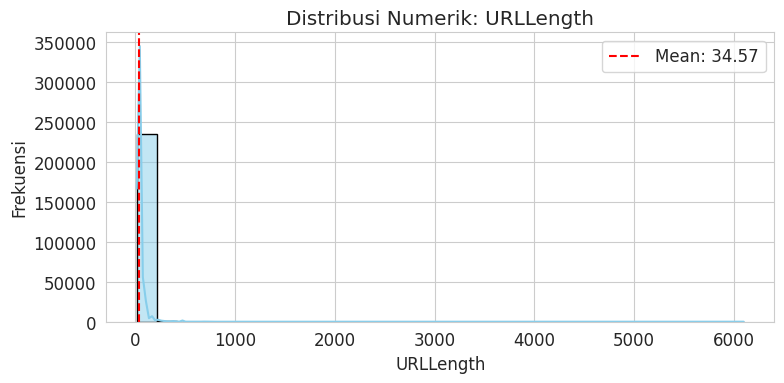

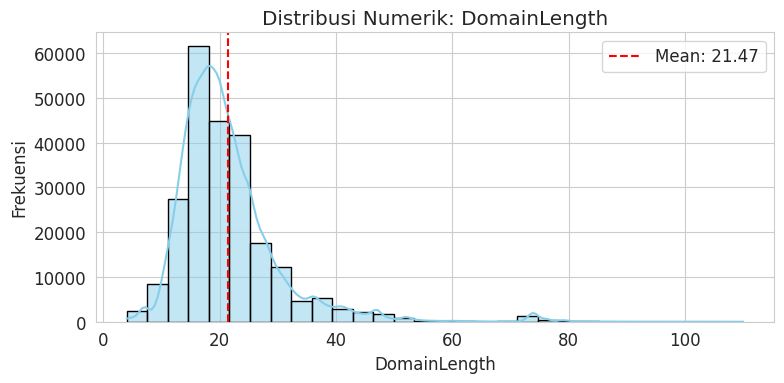

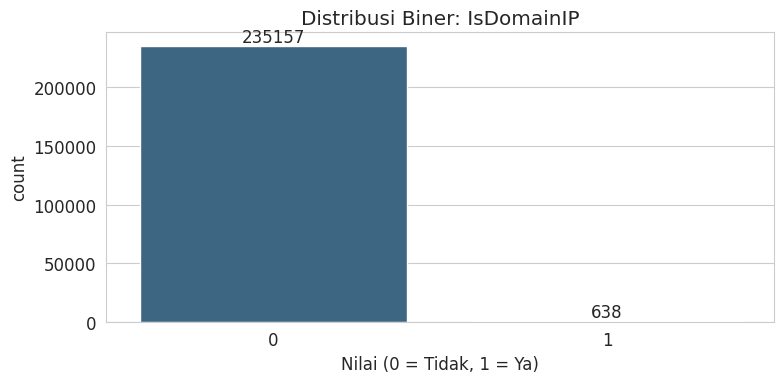

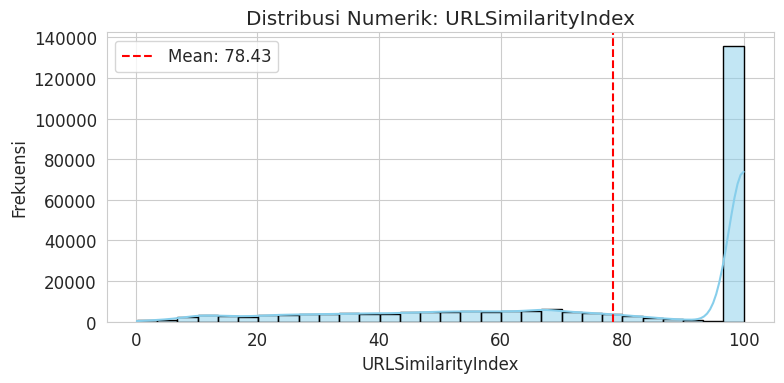

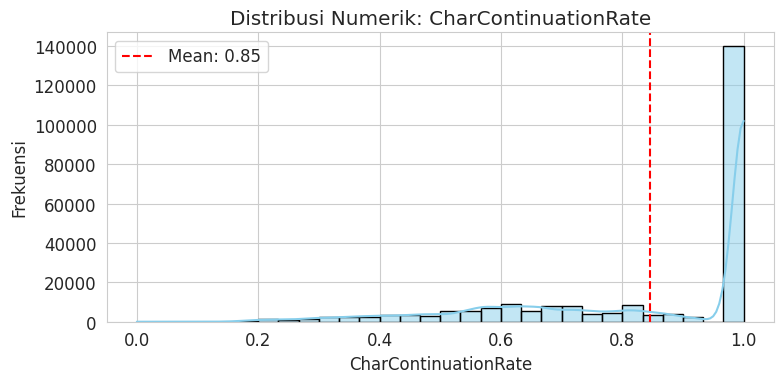

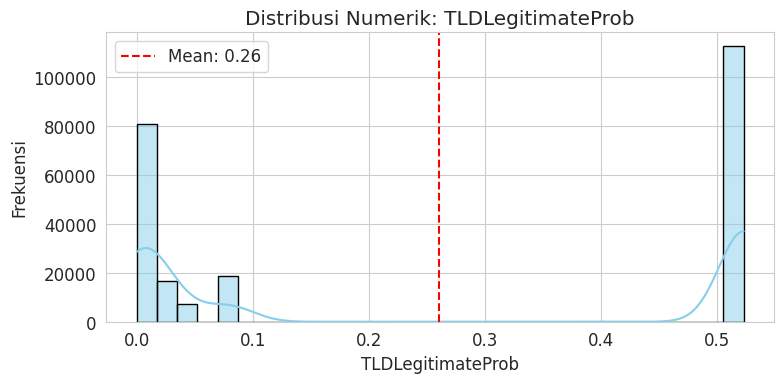

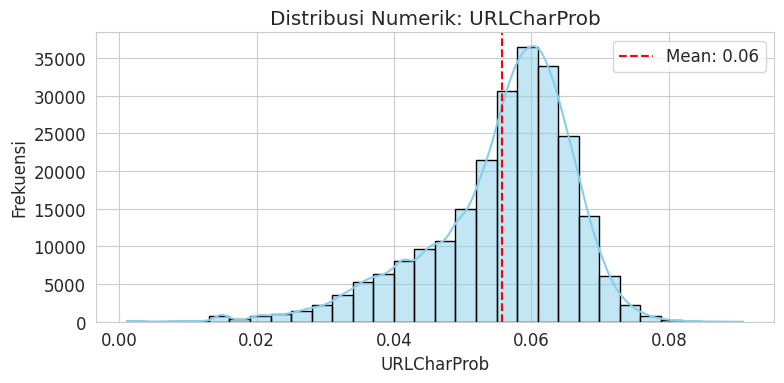

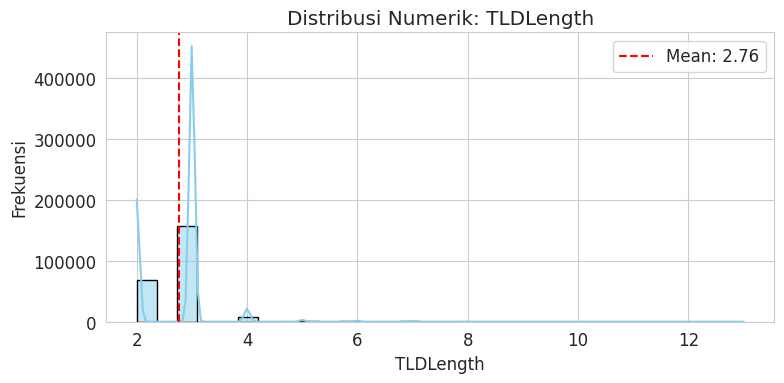

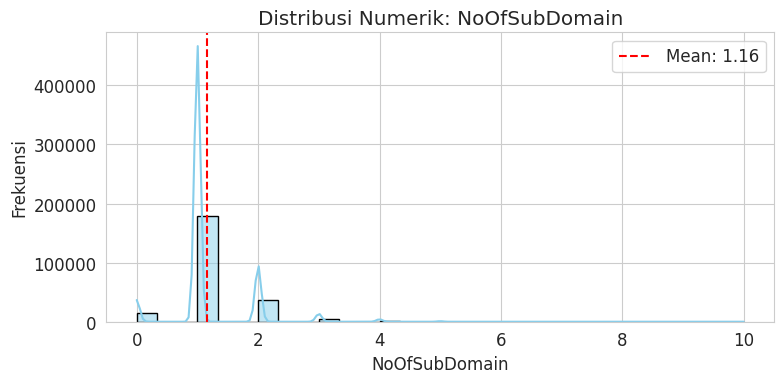

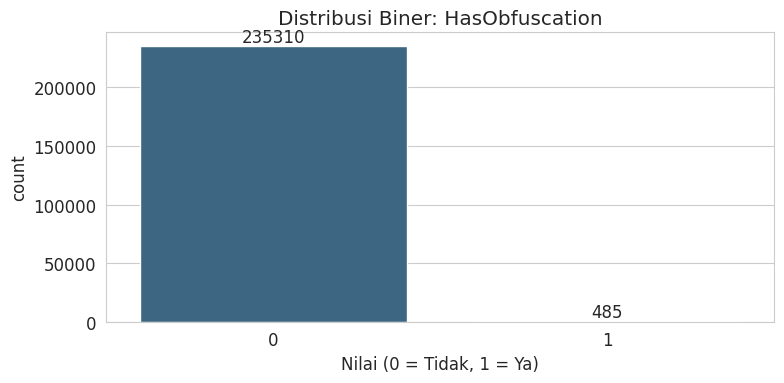

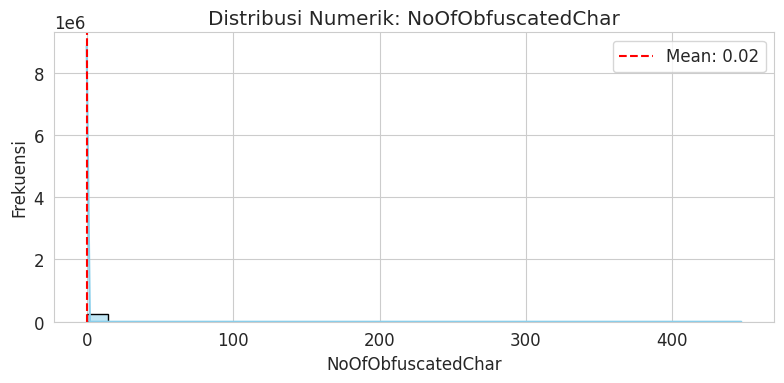

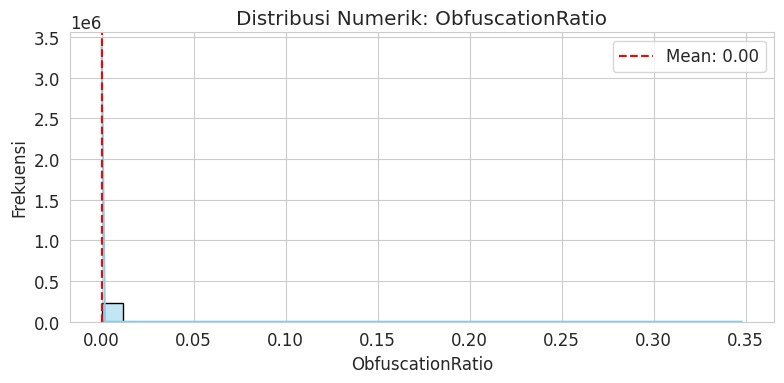

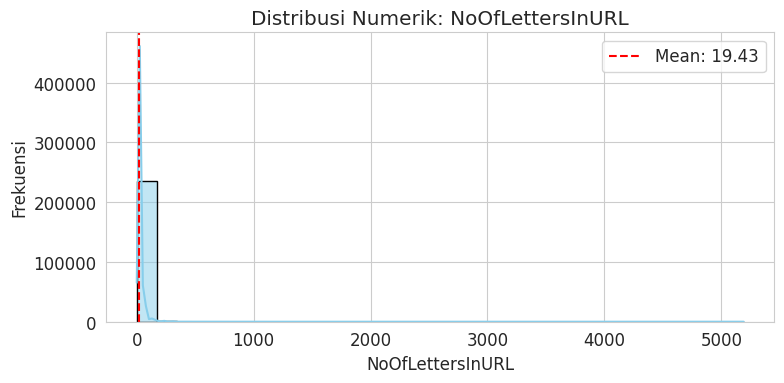

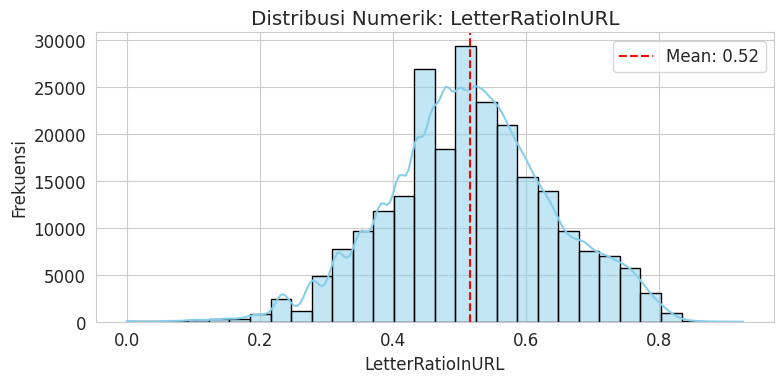

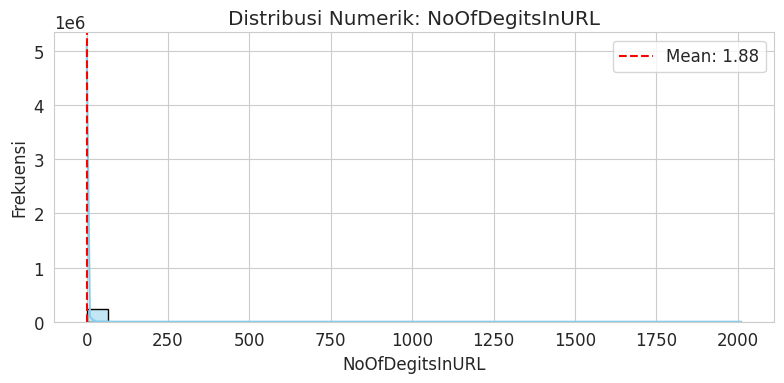

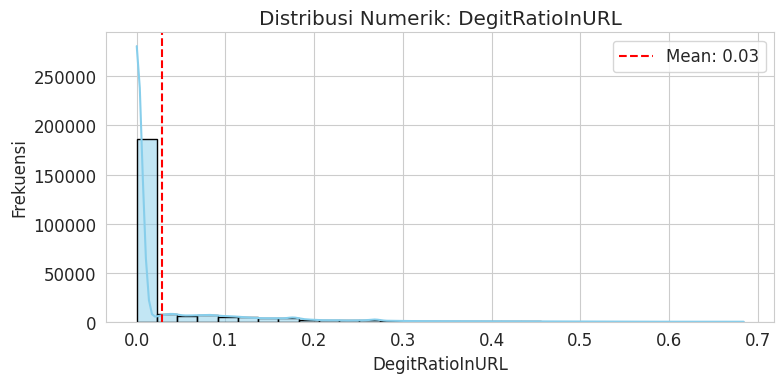

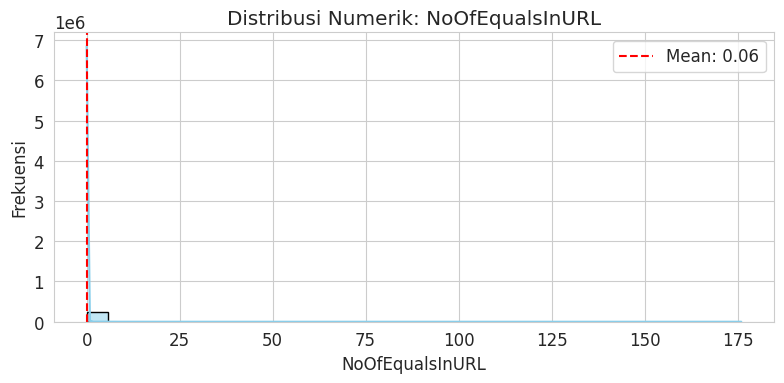

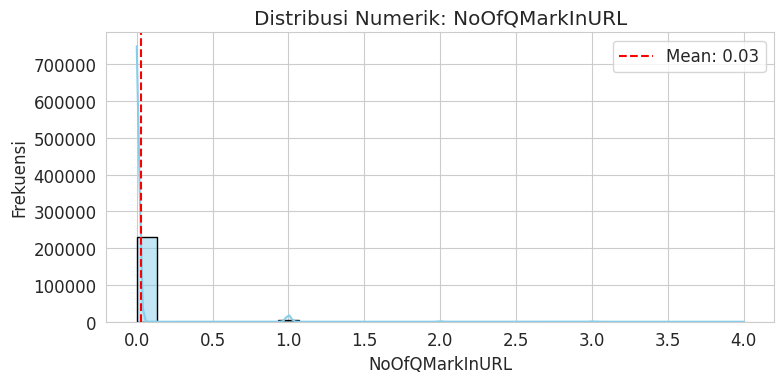

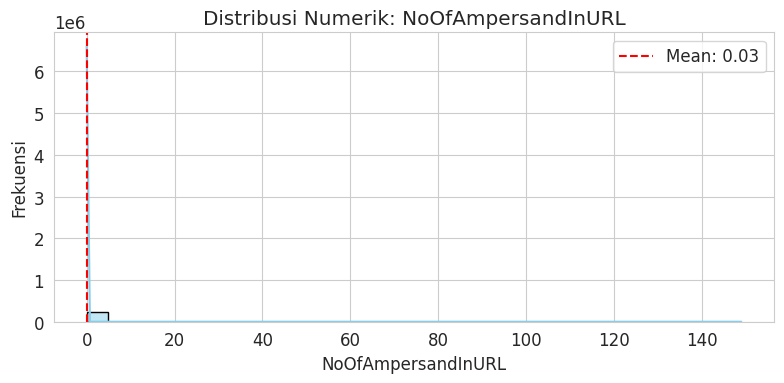

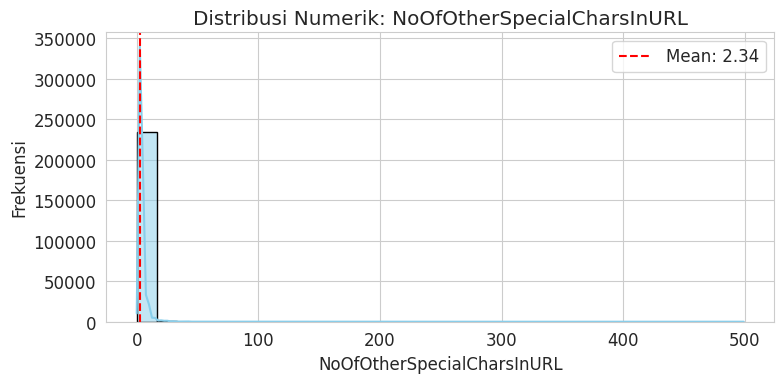

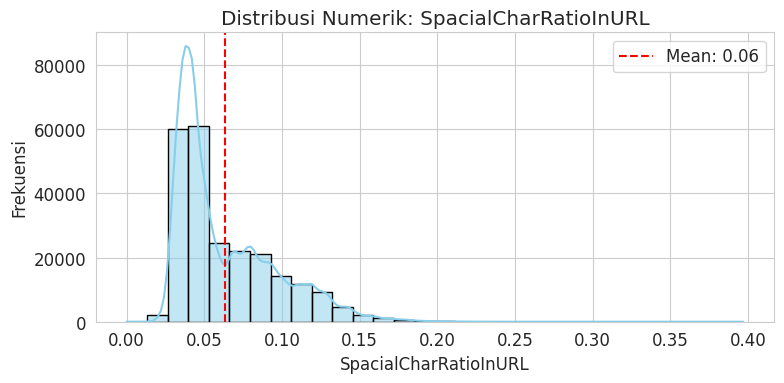

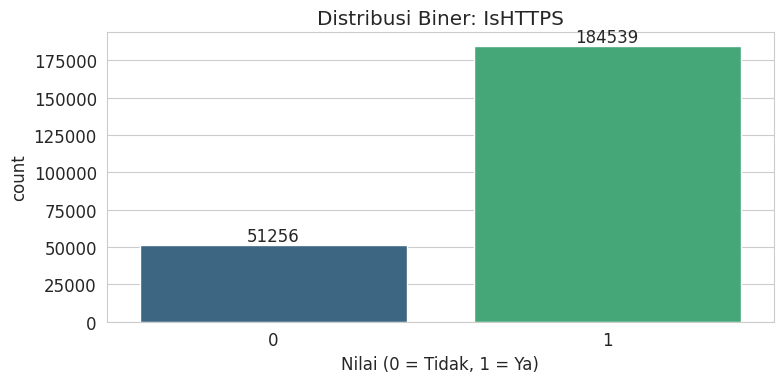

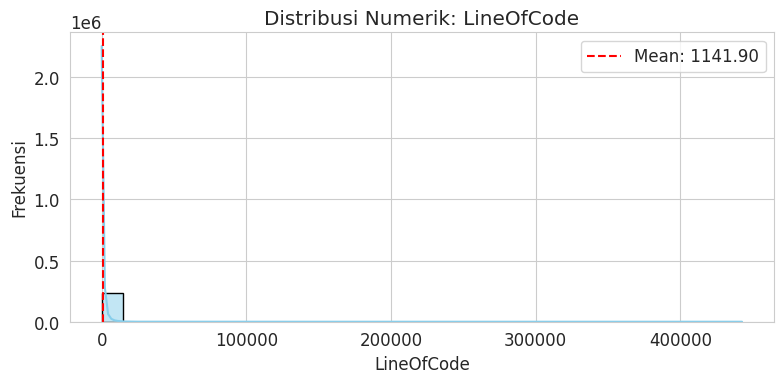

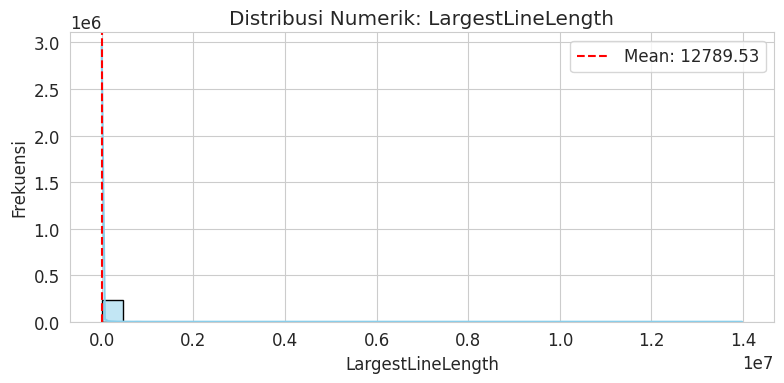

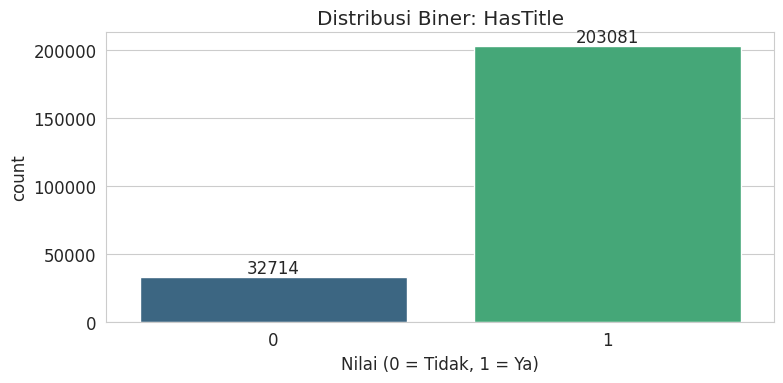

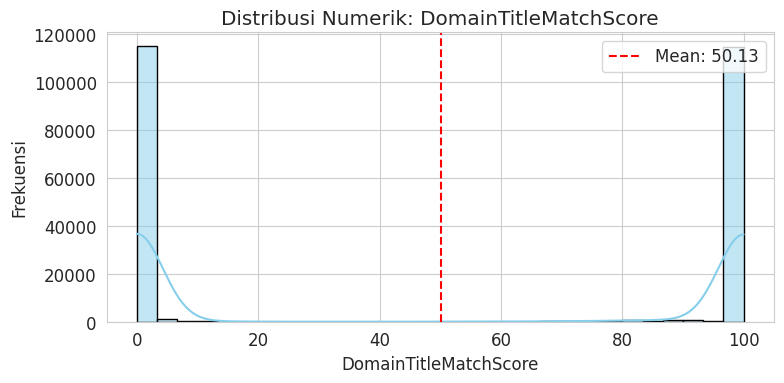

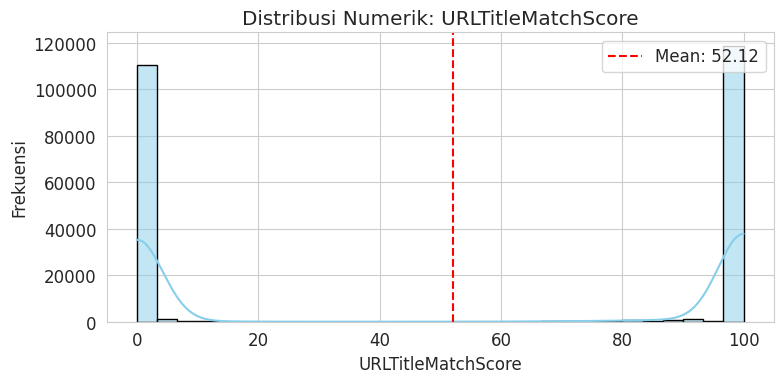

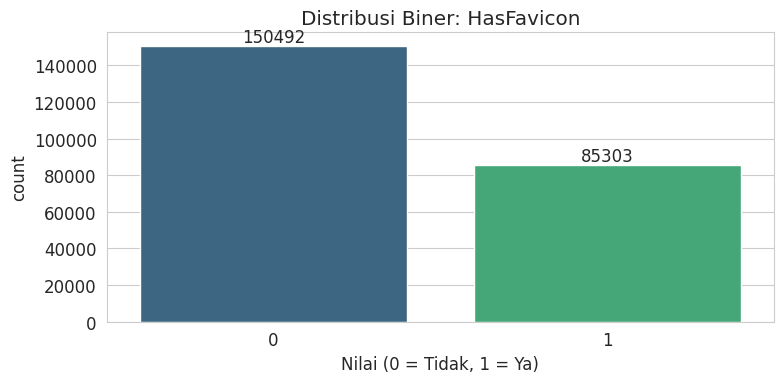

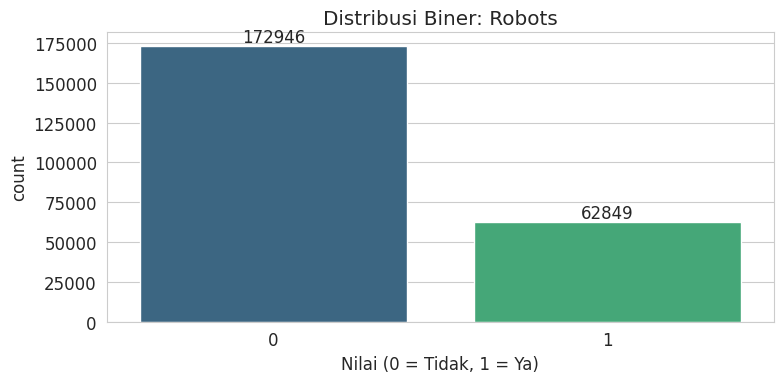

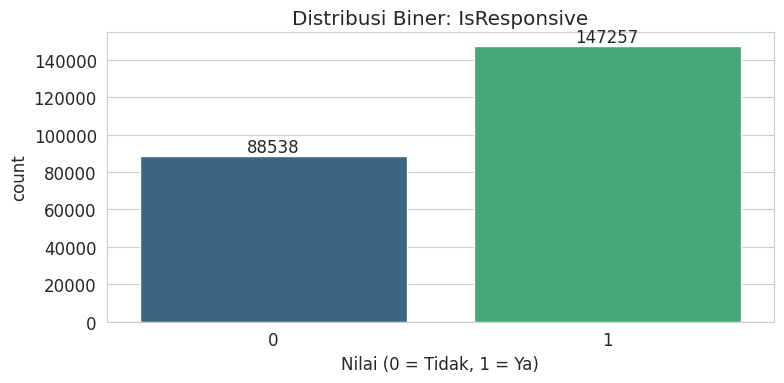

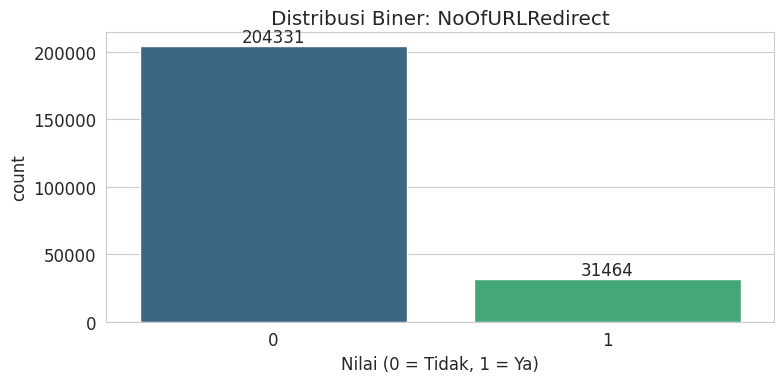

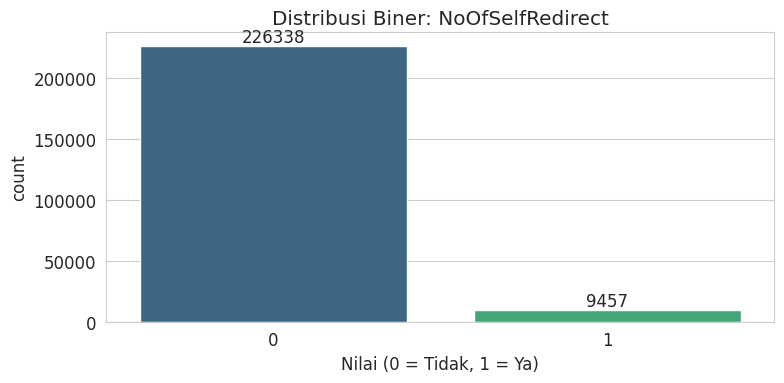

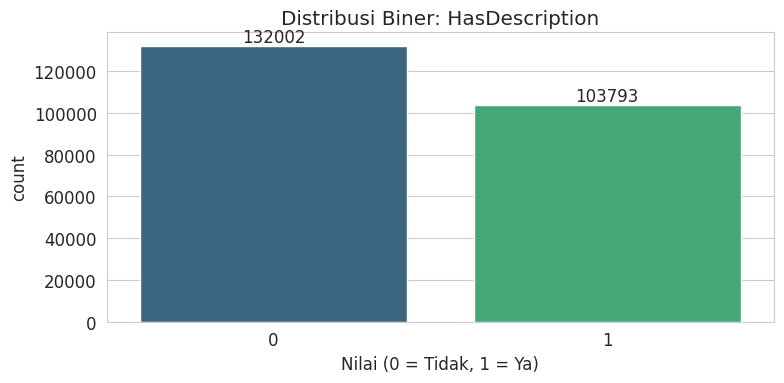

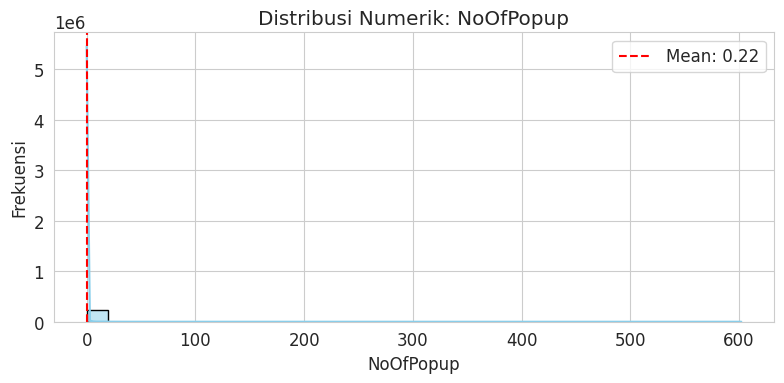

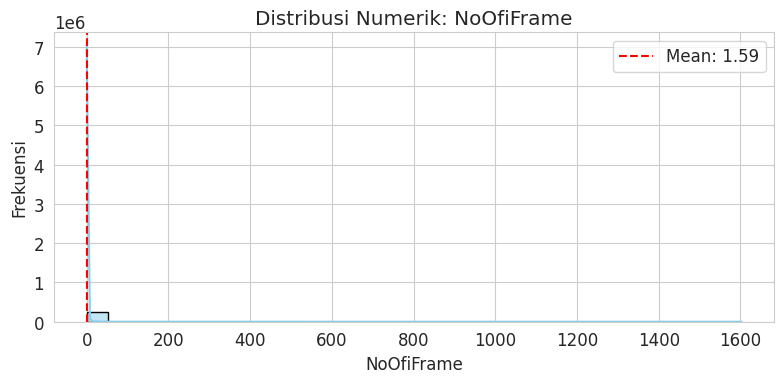

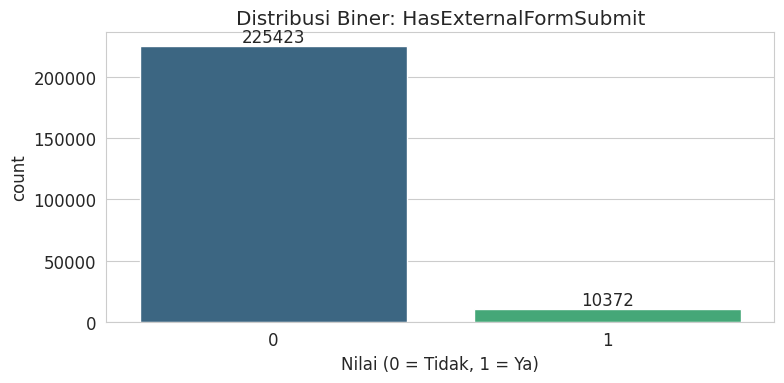

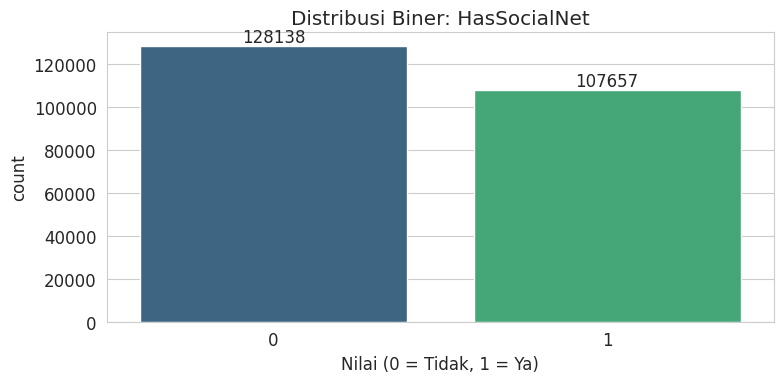

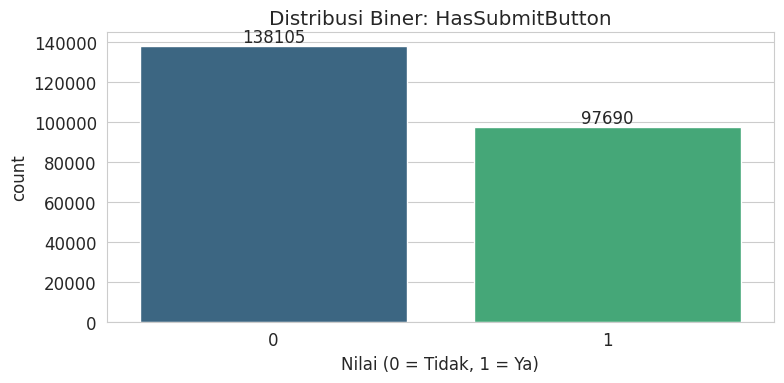

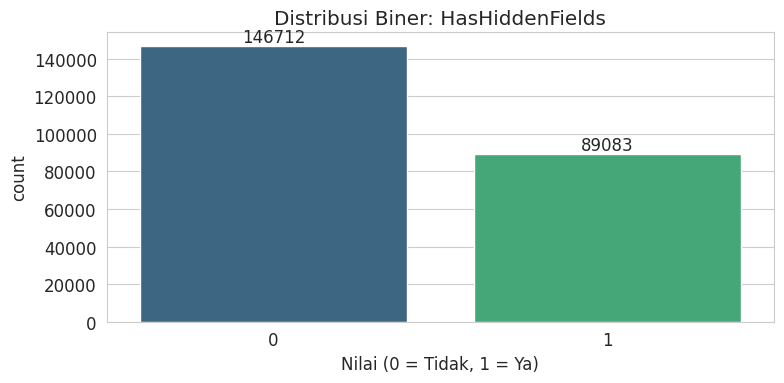

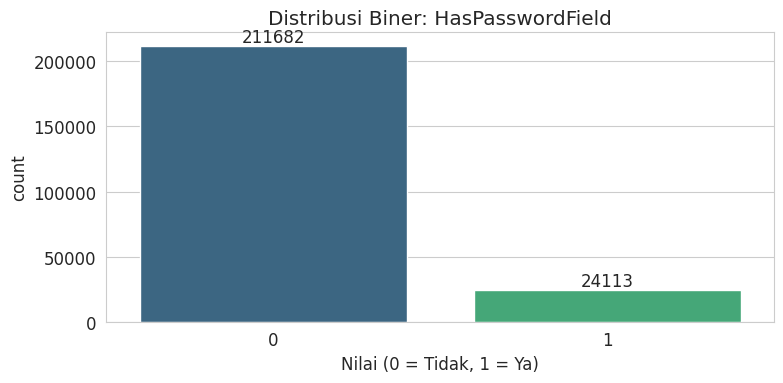

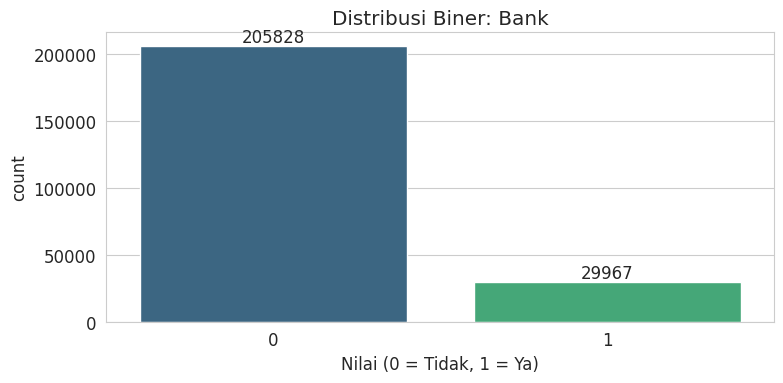

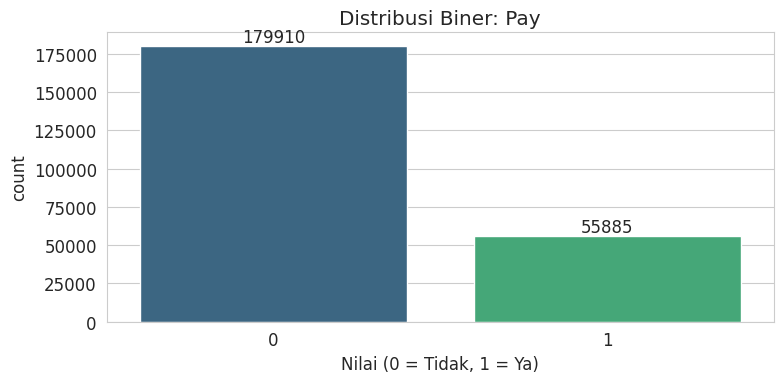

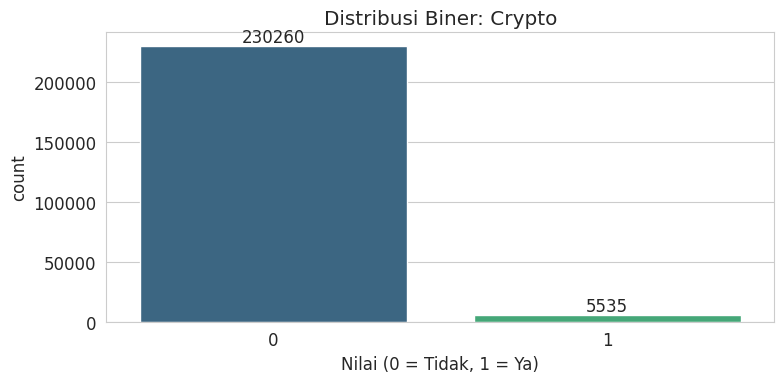

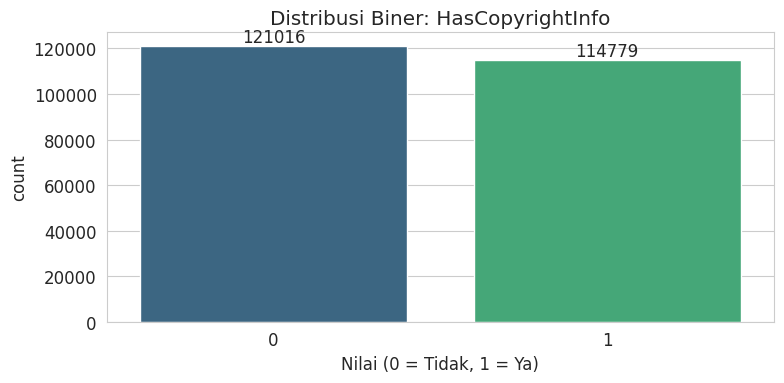

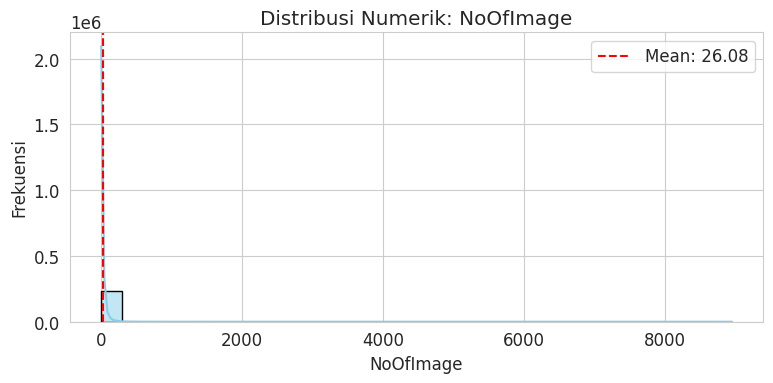

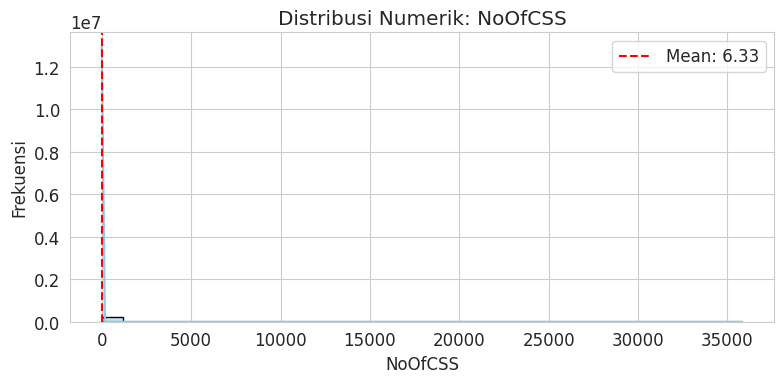

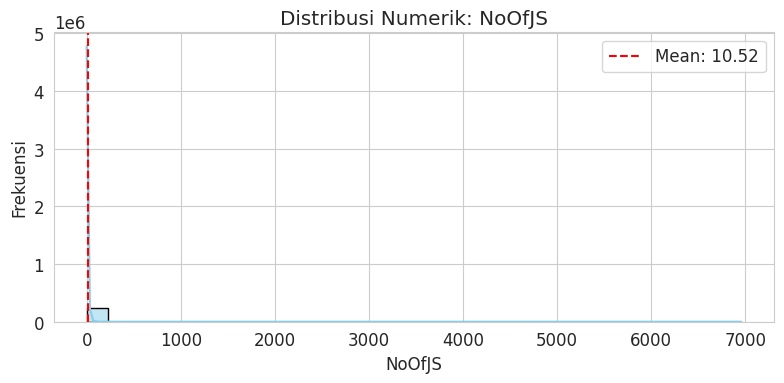

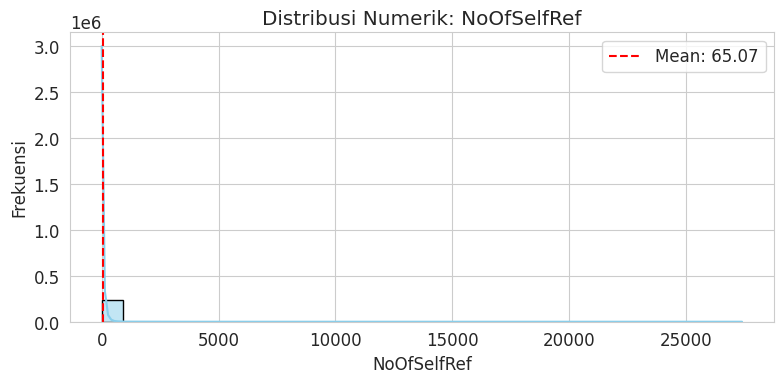

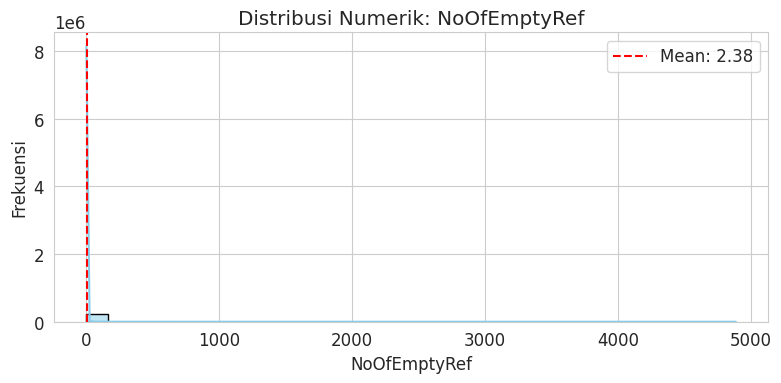

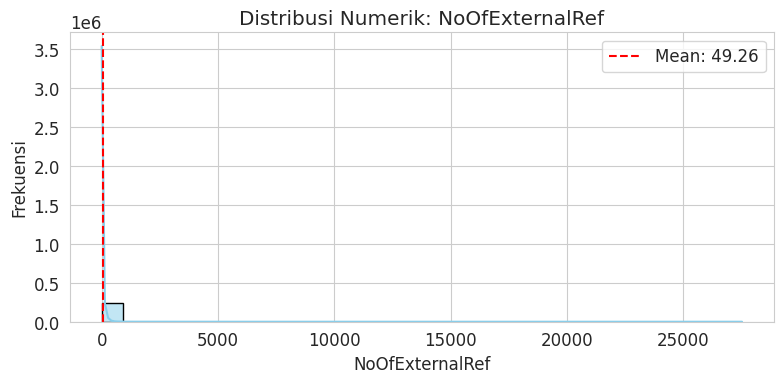

In [16]:
print("=== DISTRIBUSI KOLOM NUMERIKAL ===")
# 1. Identifikasi Kolom
num_cols = X_eda.select_dtypes(include=['float64', 'int64']).columns
bool_cols = [col for col in num_cols if X_eda[col].nunique() == 2 and set(X_eda[col].unique()).issubset({0, 1})]
continuous_cols = [col for col in num_cols if col not in bool_cols]

print(f"Total Fitur Numerik: {len(num_cols)}")
print(f" => Fitur Boolean (0/1): {len(bool_cols)}")
print(f" => Fitur Kontinu/Diskrit: {len(continuous_cols)}")
print("=" * 50)

# 2. Visualisasi
for col in num_cols:
    plt.figure(figsize=(8, 4))

    # KONDISI 1: Jika fitur adalah BOOLEAN (0/1)
    if col in bool_cols:
        ax = sns.countplot(x=X_eda[col], palette='viridis')
        plt.title(f"Distribusi Biner: {col}")
        plt.xlabel("Nilai (0 = Tidak, 1 = Ya)")

        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom')

    # KONDISI 2: Jika fitur adalah NUMERIK (Kontinu/Diskrit lainnya)
    else:
        sns.histplot(X_eda[col], bins=30, kde=True, color='skyblue', edgecolor='black')
        plt.title(f"Distribusi Numerik: {col}")
        plt.xlabel(col)
        plt.ylabel("Frekuensi")

        plt.axvline(X_eda[col].mean(), color='red', linestyle='--', label=f'Mean: {X_eda[col].mean():.2f}')
        plt.legend()

    plt.tight_layout()
    plt.show()

## Menghitung Korelasi


In [17]:
print("=== PERSIAPAN DATA UNTUK KORELASI TARGET ===")
# 1. Buat salinan agar data asli tidak rusak
df_corr = X_eda.copy()
df_corr['label'] = y_eda

# 2. Pisahkan Kolom Kategorikal vs Numerikal
cat_cols = df_corr.select_dtypes(include=['object']).columns
num_cols = df_corr.select_dtypes(include=['float64', 'int64']).columns

print(f"Fitur Kategorikal Awal: {list(cat_cols)}")

# 3. Proses Encoding
# Kita hanya encode kolom kategorikal yang cardinality-nya tidak terlalu tinggi
# Jika isinya terlalu unik / banyak, kita drop karena tidak ada gunanya dikorelasikan

cols_to_encode = []
cols_to_drop = []

for col in cat_cols:
    if df_corr[col].nunique() > 700:
        cols_to_drop.append(col)
    else:
        cols_to_encode.append(col)

print(f"Drop (Terlalu Unik): {cols_to_drop}")
print(f"Encode (Akan dihitung): {cols_to_encode}")

# Eksekusi Drop
df_corr = df_corr.drop(columns=cols_to_drop)

# Frequency Encoding
for col in cols_to_encode:
    # 1. Hitung jumlah kemunculan / frekuensi setiap kategori
    freq_map = df_corr[col].value_counts()

    # 2. Mapping angka frekuensi tersebut ke kolom
    df_corr[col] = df_corr[col].map(freq_map)

# Cek hasil
print("\nContoh data setelah Frequency Encoding:")
display(df_corr[cols_to_encode].head())

print(f"\nShape akhir df_combined: {df_corr.shape}")
display(df_corr.head())

=== PERSIAPAN DATA UNTUK KORELASI TARGET ===
Fitur Kategorikal Awal: ['URL', 'Domain', 'TLD', 'Title']
Drop (Terlalu Unik): ['URL', 'Domain', 'Title']
Encode (Akan dihitung): ['TLD']

Contoh data setelah Frequency Encoding:


,TLD
0,112554
1,3996
2,6395
3,112554
4,18793



Shape akhir df_combined: (235795, 52)


,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,31,24,0,112554,100.0,1.000000,0.522907,0.061933,3,1,...,0,0,1,34,20,28,119,0,124,1
1,23,16,0,3996,100.0,0.666667,0.032650,0.050207,2,1,...,0,0,1,50,9,8,39,0,217,1
2,29,22,0,6395,100.0,0.866667,0.028555,0.064129,2,2,...,0,0,1,10,2,7,42,2,5,1
3,26,19,0,112554,100.0,1.000000,0.522907,0.057606,3,1,...,1,1,1,3,27,15,22,1,31,1
4,33,26,0,18793,100.0,1.000000,0.079963,0.059441,3,1,...,1,0,1,244,15,34,72,1,85,1


In [18]:
print("=== KORELASI FITUR TERHADAP TARGET ===")
# 1. Hitung Korelasi
correlation_matrix = df_corr.corr(numeric_only=True)

# 2. Ambil korelasi terhadap 'label'
target_corr = correlation_matrix['label'].drop('label')

# 3. Urutkan dari yang paling positif ke paling negatif
target_corr_sorted = target_corr.sort_values(ascending=False)

print(target_corr_sorted)

=== KORELASI FITUR TERHADAP TARGET ===
URLSimilarityIndex            0.860358
HasSocialNet                  0.784255
HasCopyrightInfo              0.743358
HasDescription                0.690232
IsHTTPS                       0.609132
DomainTitleMatchScore         0.584905
HasSubmitButton               0.578561
IsResponsive                  0.548608
URLTitleMatchScore            0.539419
HasHiddenFields               0.507731
HasFavicon                    0.493711
URLCharProb                   0.469749
CharContinuationRate          0.467735
HasTitle                      0.459725
Robots                        0.392620
NoOfJS                        0.373500
Pay                           0.359747
NoOfSelfRef                   0.316211
NoOfImage                     0.274658
LineOfCode                    0.272257
NoOfExternalRef               0.258627
NoOfiFrame                    0.225822
Bank                          0.188959
HasExternalFormSubmit         0.167574
HasPasswordField         

=== VISUALISASI KORELASI FITUR DENGAN TARGET ===


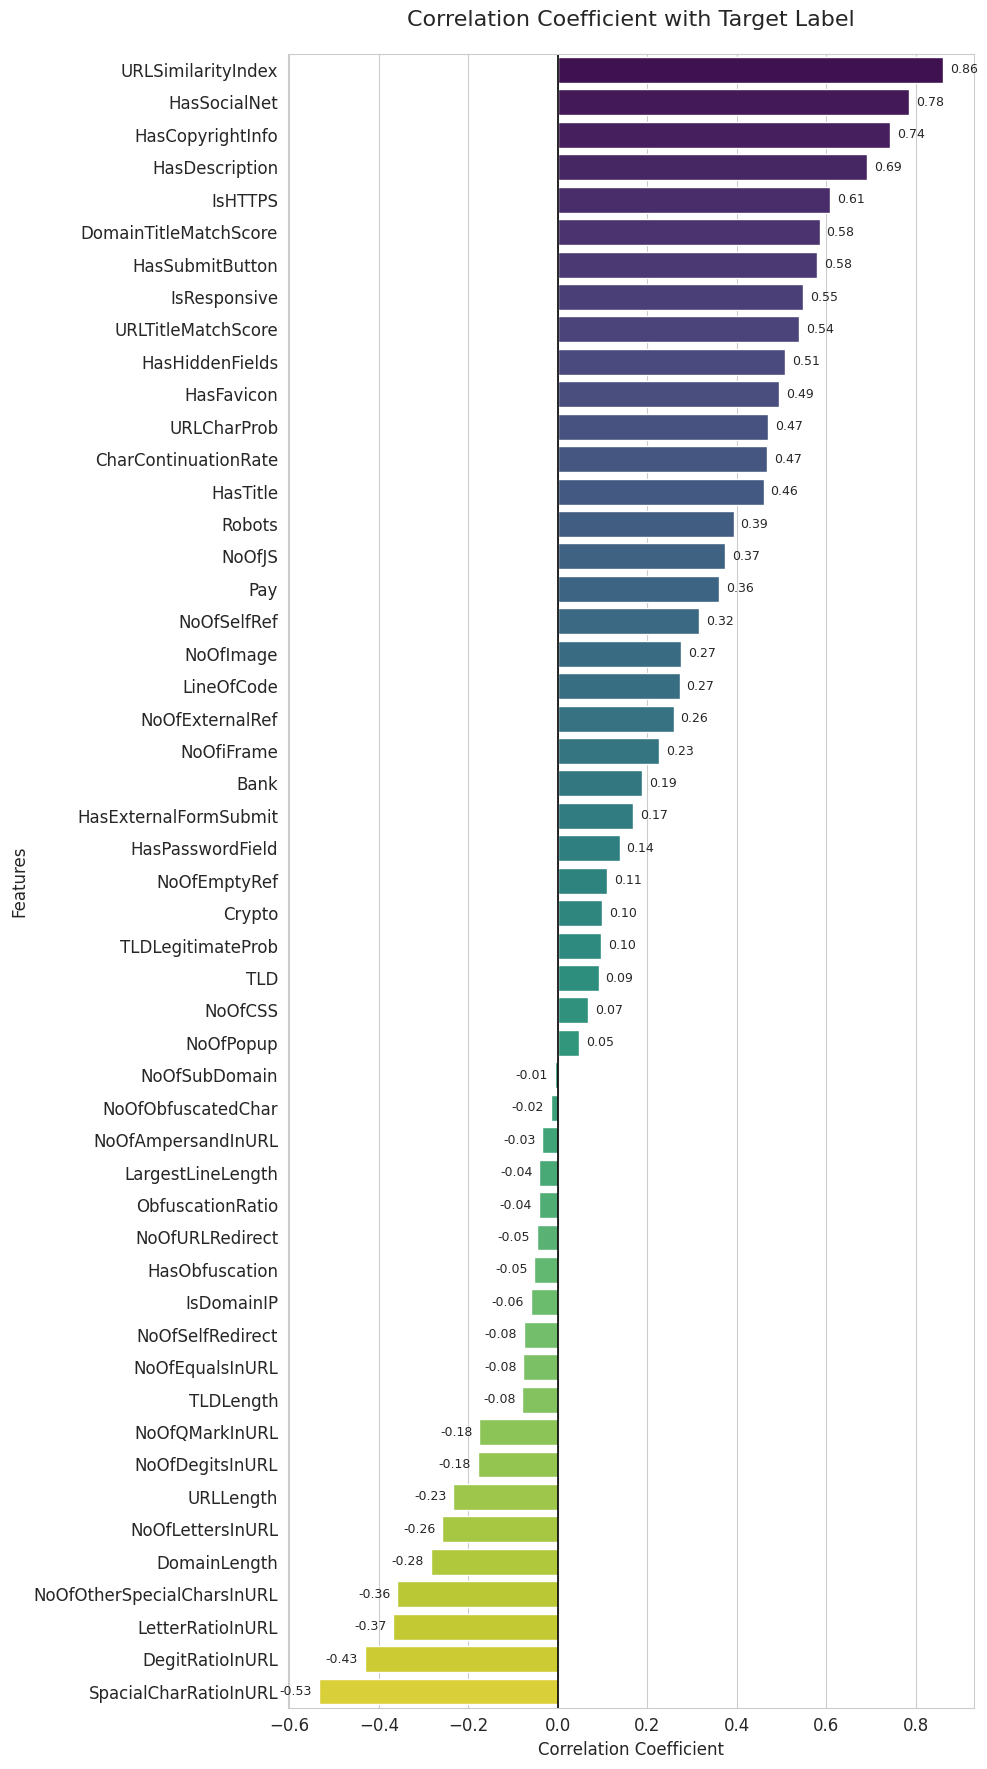

In [19]:
print("=== VISUALISASI KORELASI FITUR DENGAN TARGET ===")
plt.figure(figsize=(10, len(target_corr_sorted) * 0.35))

# Plotting
barplot = sns.barplot(x=target_corr_sorted.values, y=target_corr_sorted.index, palette='viridis')

plt.title('Correlation Coefficient with Target Label', fontsize=16, pad=20)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Tambahkan garis vertikal di angka 0 sebagai batas netral
plt.axvline(0, color='black', linewidth=1.2, linestyle='-')

# Menambahkan nilai angka di ujung batang
for i in barplot.containers:
    barplot.bar_label(i, fmt='%.2f', padding=5, fontsize=9)

plt.tight_layout()
plt.show()

=== ANALISIS HUBUNGAN ANTAR FITUR ===


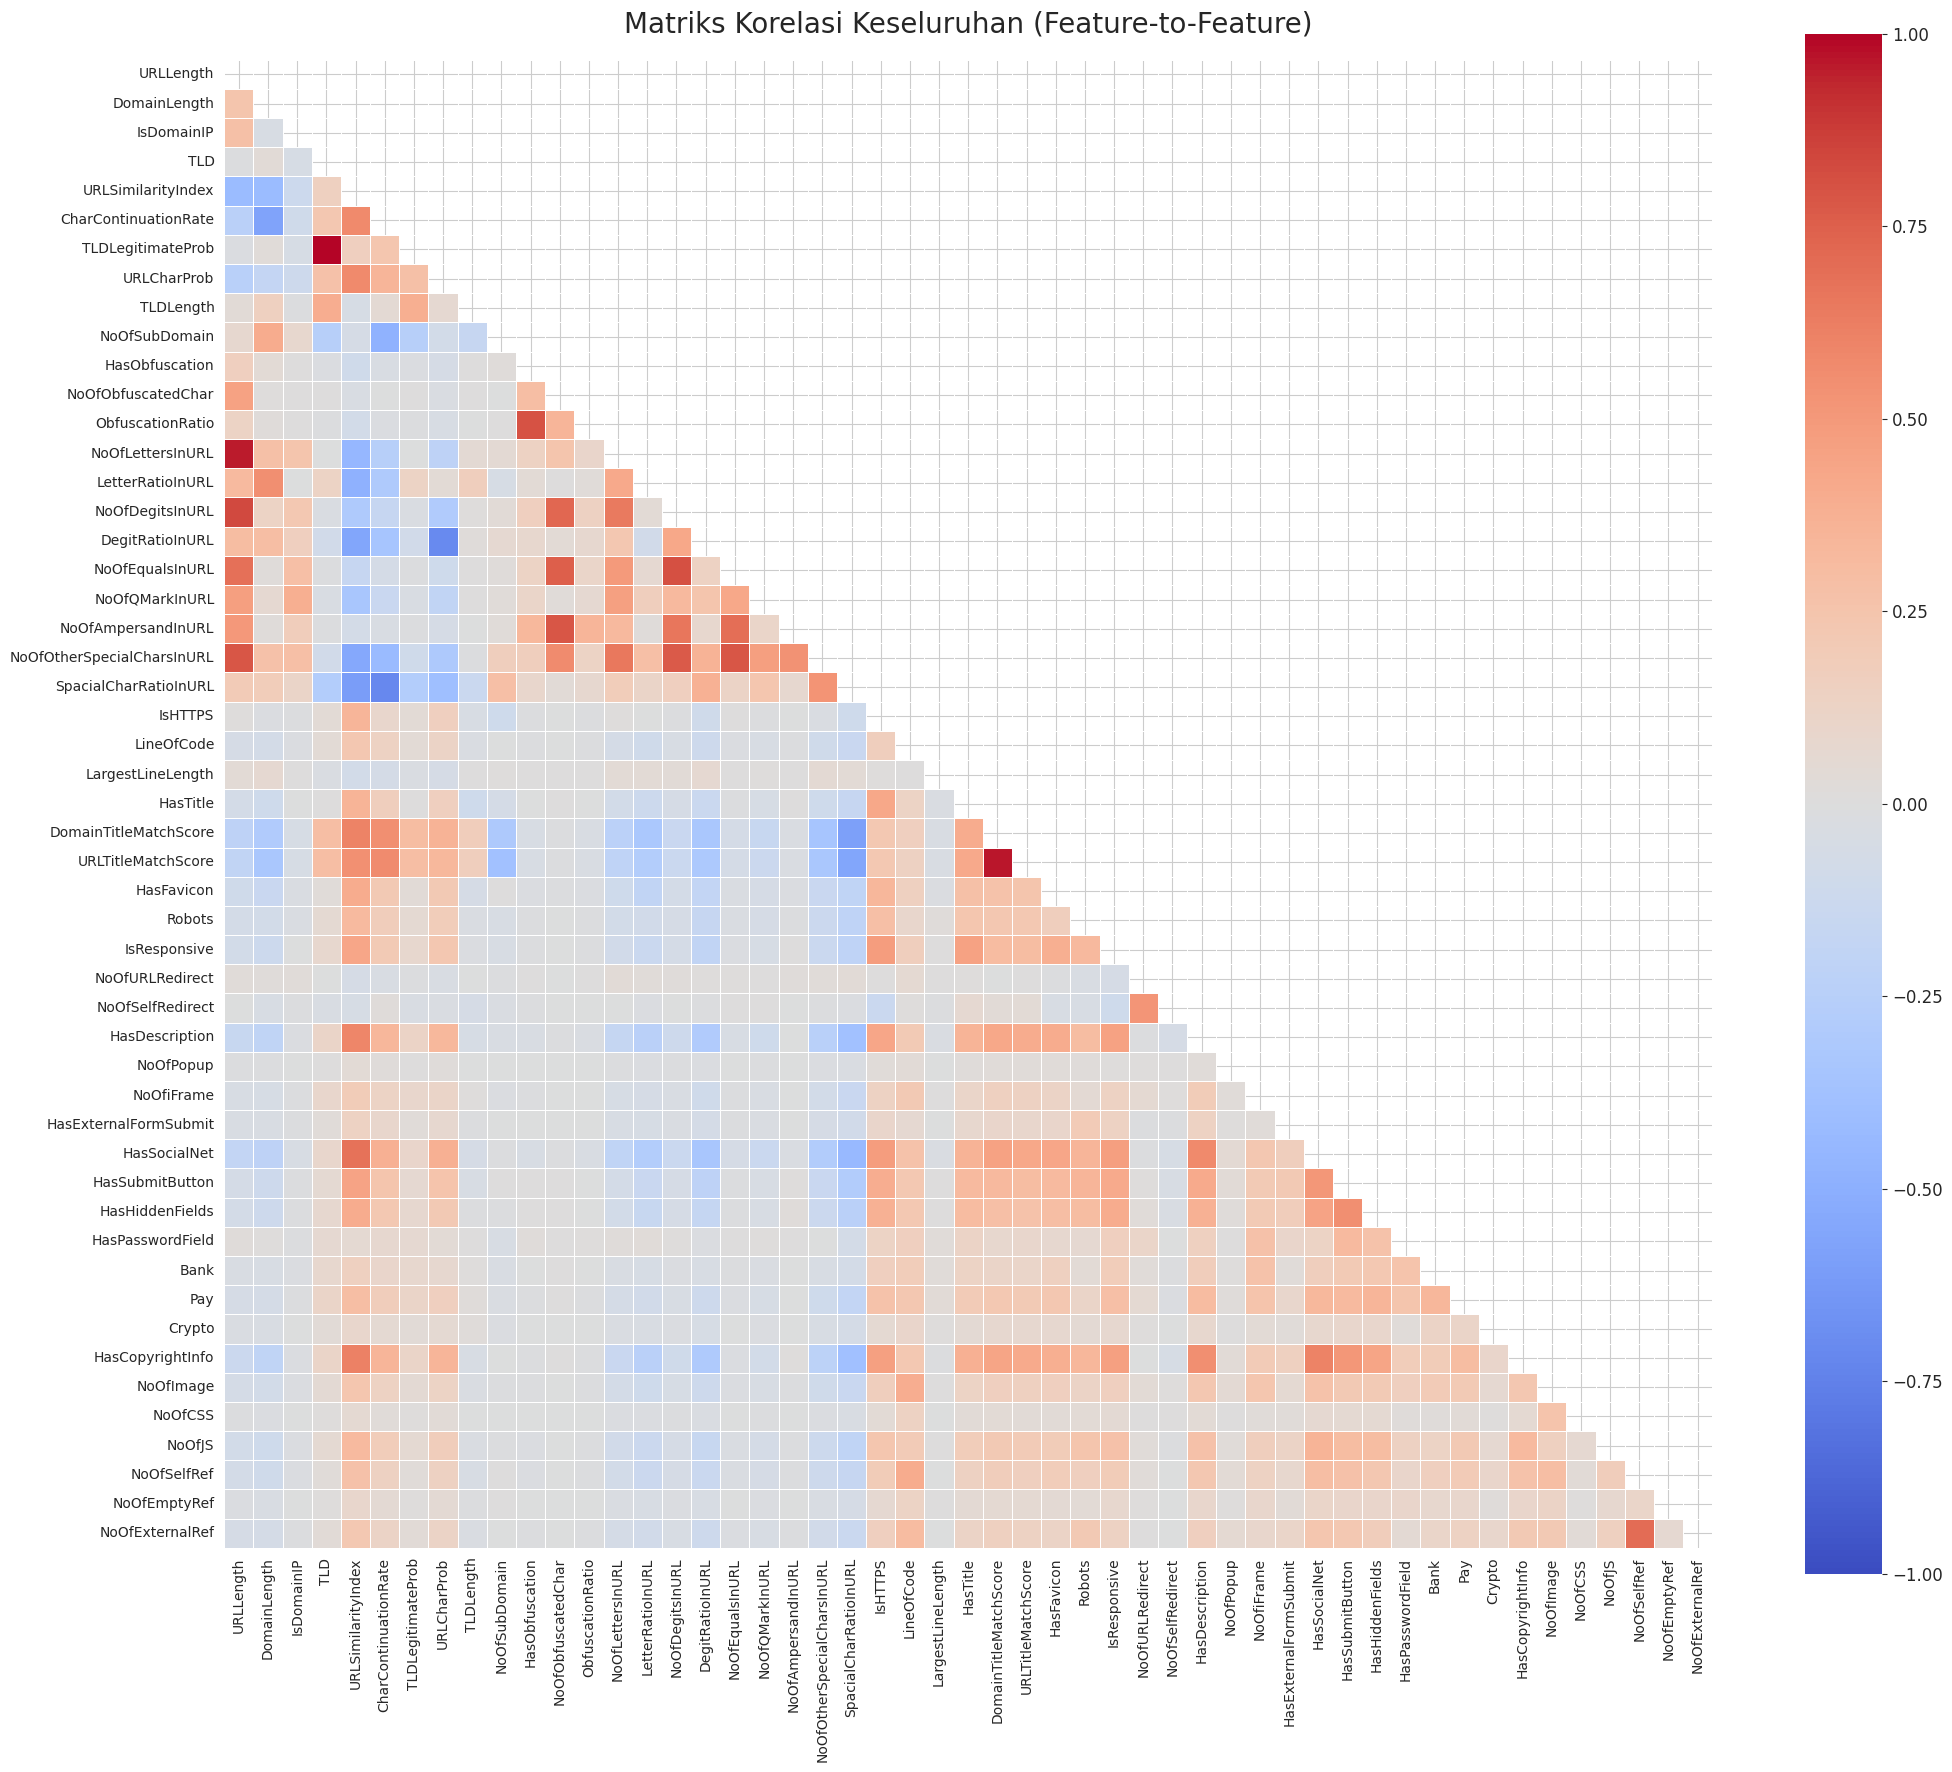


DAFTAR DETIL PASANGAN FITUR REDUNDAN
- TLDLegitimateProb         <--> TLD                       : 0.9997
- NoOfLettersInURL          <--> URLLength                 : 0.9560
- URLTitleMatchScore        <--> DomainTitleMatchScore     : 0.9610


In [20]:
print("=== ANALISIS HUBUNGAN ANTAR FITUR ===")

# 1. Hitung Matriks Korelasi Semua Fitur
corr_matrix = df_corr.drop(columns=['label']).corr(numeric_only=True)

# 2. Visualisasi Heatmap
plt.figure(figsize=(24, 20))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plotting
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm',
            linewidths=0.5, vmin=-1, vmax=1, square=True)

plt.title('Matriks Korelasi Keseluruhan (Feature-to-Feature)', fontsize=20, pad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

print("\n" + "="*50)
print("DAFTAR DETIL PASANGAN FITUR REDUNDAN")
print("="*50)

# Threshold untuk dianggap Redundan (Biasanya 0.9 atau 0.95 untuk di-drop)
threshold_visual = 0.95

redundant_pairs = []
cols = corr_matrix.columns

for i in range(len(cols)):
    for j in range(i):
        # Cek nilai absolut (karena korelasi negatif -0.99 juga redundan)
        if abs(corr_matrix.iloc[i, j]) > threshold_visual:
            pair_info = f"- {cols[i]:<25} <--> {cols[j]:<25} : {corr_matrix.iloc[i, j]:.4f}"
            redundant_pairs.append(pair_info)
            print(pair_info)

# Preprocessing

In [21]:
df_processing = X.copy()
targets = y.copy()
df_processing['label'] = targets['label']

In [22]:
print("=== DROP KOLOM KATEGORIKAL YANG TIDAK DIPERLUKAN ===")
cols_to_drop = ['URL', 'Domain', 'Title']
existing_drop = [c for c in cols_to_drop if c in df_processing.columns]
if existing_drop:
    df_processing = df_processing.drop(columns=existing_drop)
    print(f"Kolom Kategorikal Dibuang: {existing_drop}")

=== DROP KOLOM KATEGORIKAL YANG TIDAK DIPERLUKAN ===
Kolom Kategorikal Dibuang: ['URL', 'Domain', 'Title']


In [23]:
print("=== TLD FREQUENCY ENCODING ===")
if 'TLD' in df_processing.columns:
    tld_map = df_processing['TLD'].value_counts()
    df_processing['TLD_Freq'] = df_processing['TLD'].map(tld_map)
    df_processing = df_processing.drop(columns=['TLD'])
    print("Feature Engineering: 'TLD' -> 'TLD_Freq'")

=== TLD FREQUENCY ENCODING ===
Feature Engineering: 'TLD' -> 'TLD_Freq'


In [24]:
print("=== MENGHAPUS BARIS DUPLIKAT ===")
initial_rows = len(df_processing)
df_processing = df_processing.drop_duplicates()
print(f"Data Cleaning: Dihapus {initial_rows - len(df_processing)} baris duplikat.")

=== MENGHAPUS BARIS DUPLIKAT ===
Data Cleaning: Dihapus 808 baris duplikat.


In [25]:
X_final = df_processing.drop(columns=['label'])
y_final = df_processing['label']
print("=== Shape Final X setelah dipreprocess ===")
print(f"   Shape Final X: {X_final.shape}")
print(f"   Shape Final y: {y_final.shape}")
X_final.info()

=== Shape Final X setelah dipreprocess ===
   Shape Final X: (234987, 51)
   Shape Final y: (234987,)
<class 'pandas.core.frame.DataFrame'>
Index: 234987 entries, 0 to 235794
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   234987 non-null  int64  
 1   DomainLength                234987 non-null  int64  
 2   IsDomainIP                  234987 non-null  int64  
 3   URLSimilarityIndex          234987 non-null  float64
 4   CharContinuationRate        234987 non-null  float64
 5   TLDLegitimateProb           234987 non-null  float64
 6   URLCharProb                 234987 non-null  float64
 7   TLDLength                   234987 non-null  int64  
 8   NoOfSubDomain               234987 non-null  int64  
 9   HasObfuscation              234987 non-null  int64  
 10  NoOfObfuscatedChar          234987 non-null  int64  
 11  ObfuscationRatio            23498

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.3, random_state=42, stratify=y_final
)

print("="*40)
print("PREPROCESSING SELESAI")
print("="*40)
print(f"Data Training (X_train): {X_train.shape}")
print(f"Data Testing  (X_test) : {X_test.shape}")

PREPROCESSING SELESAI
Data Training (X_train): (164490, 51)
Data Testing  (X_test) : (70497, 51)


# Skenario 1

In [27]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss', n_jobs=-1),
    "LightGBM": lgb.LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)
}

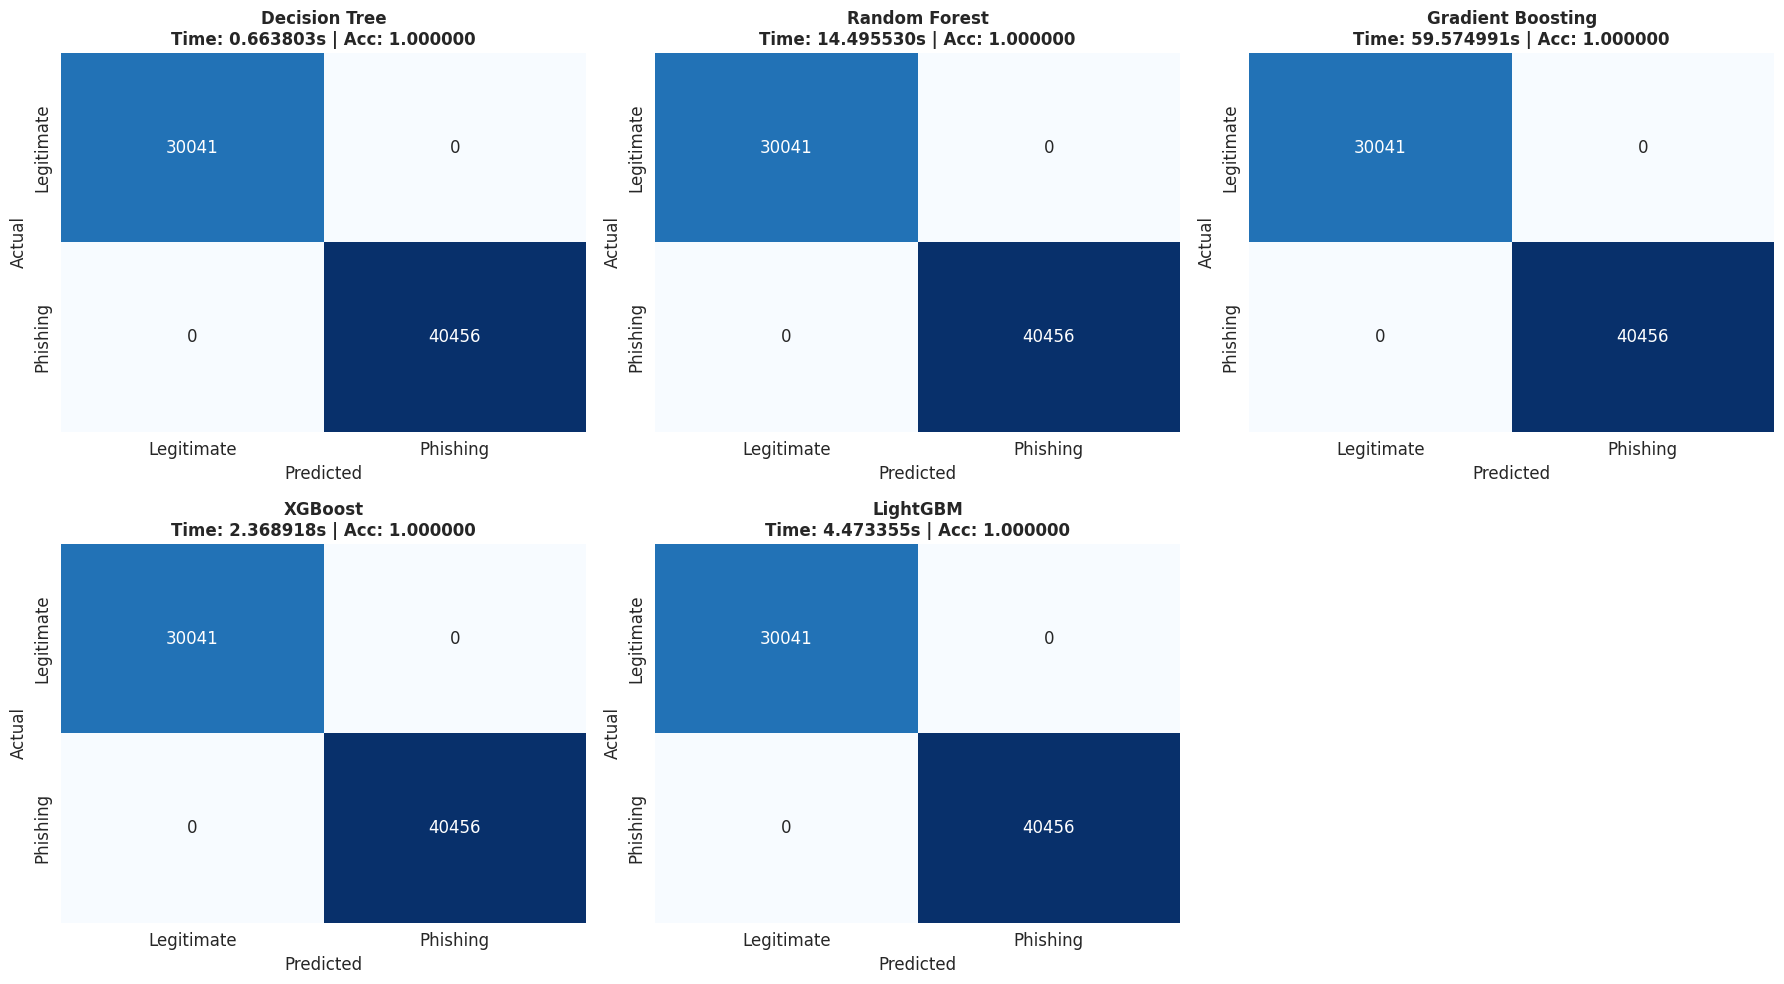

In [28]:
# Siapkan Layout Plot (2 baris, 3 kolom)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# List untuk menyimpan hasil agar bisa dipakai di Tabel Perbandingan Akhir
results_baseline = []

for i, (name, model) in enumerate(models.items()):
    # 1. Training & Timing
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time

    # 2. Prediksi
    y_pred = model.predict(X_test)

    # 3. Hitung Metrik Lengkap
    acc = accuracy_score(y_test, y_pred)
    # average='binary' karena target kita cuma 0 dan 1
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

    # 4. Buat Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # 5. Visualisasi
    # Gunakan warna 'Blues' untuk Skenario 1 (Baseline)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i])

    # Judul Informatif
    axes[i].set_title(f"{name}\nTime: {train_time:.6f}s | Acc: {acc:.6f}", fontsize=12, fontweight='bold')
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
    axes[i].set_xticklabels(['Legitimate', 'Phishing'])
    axes[i].set_yticklabels(['Legitimate', 'Phishing'])

    # 6. Simpan Data untuk Tabel Akhir
    results_baseline.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "Training Time (s)": train_time
    })

# Hapus subplot kosong
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

,Model,Accuracy,Precision,Recall,F1-Score,Training Time (s)
0,Decision Tree,1.000000,1.000000,1.000000,1.000000,0.663803
3,XGBoost,1.000000,1.000000,1.000000,1.000000,2.368918
4,LightGBM,1.000000,1.000000,1.000000,1.000000,4.473355
1,Random Forest,1.000000,1.000000,1.000000,1.000000,14.495530
2,Gradient Boosting,1.000000,1.000000,1.000000,1.000000,59.574991


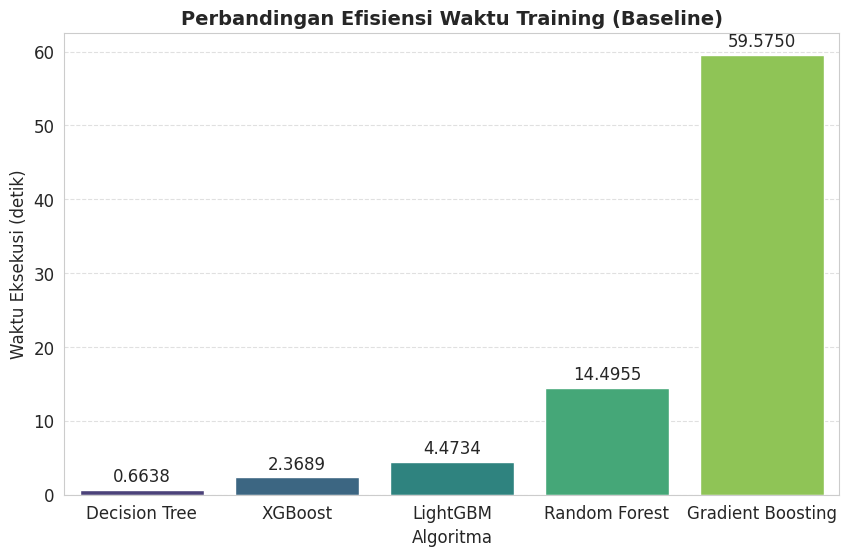

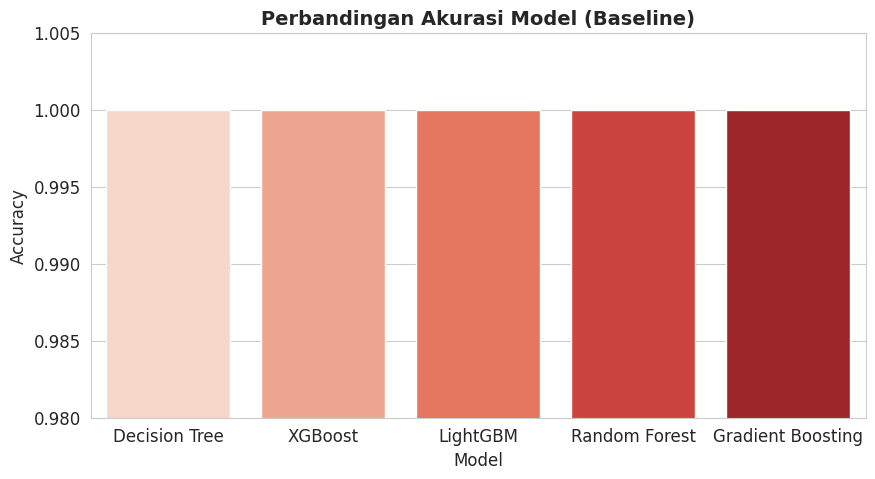

In [29]:
df_baseline = pd.DataFrame(results_baseline).sort_values(by="Training Time (s)")
# Format angka agar rapi (4 angka di belakang koma)
display(df_baseline.style.format({
    "Accuracy": "{:.6f}",
    "Precision": "{:.6f}",
    "Recall": "{:.6f}",
    "F1-Score": "{:.6f}",
    "Training Time (s)": "{:.6f}"
}).background_gradient(cmap='Blues', subset=['Training Time (s)']))

# 2. Grafik Bar Chart (Waktu Training)
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    x="Model",
    y="Training Time (s)",
    data=df_baseline,
    palette="viridis"
)

# Hiasan Grafik
plt.title("Perbandingan Efisiensi Waktu Training (Baseline)", fontsize=14, fontweight='bold')
plt.ylabel("Waktu Eksekusi (detik)", fontsize=12)
plt.xlabel("Algoritma", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Tampilkan angka di atas batang
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.4f', padding=3)

plt.show()

# 3. Grafik Bar Chart (Akurasi - Opsional, biasanya rata tinggi semua)
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=df_baseline, palette="Reds")
plt.title("Perbandingan Akurasi Model (Baseline)", fontsize=14, fontweight='bold')
plt.ylim(0.98, 1.005) # Zoom in karena akurasi pasti > 99%
plt.show()

# Skenario 2: Hyperparameter Tuning

In [ ]:
param_grids = {
    # 1. Decision Tree: Fokus membatasi kedalaman agar tidak jadi "pohon raksasa"
    "Decision Tree": {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [3, 5, 10],
            'min_samples_leaf': [1, 5, 10],
            'criterion': ['gini', 'entropy']
        }
    },

    # 2. Random Forest: Kurangi jumlah pohon & kedalaman
    "Random Forest": {
        'model': RandomForestClassifier(random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [5, 10, 20, 50],
            'max_depth': [3, 5, 10],
            'min_samples_leaf': [1, 5]
        }
    },

    # 3. Gradient Boosting (Klasik): Cenderung lambat, batasi ketat
    "Gradient Boosting": {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [10, 20, 50],
            'max_depth': [3, 5],
            'learning_rate': [0.1, 0.3]
        }
    },

    # 4. XGBoost: Raja efisiensi
    "XGBoost": {
        'model': XGBClassifier(random_state=42, eval_metric='logloss', n_jobs=-1),
        'params': {
            'n_estimators': [10, 20, 50],
            'max_depth': [3, 4, 5],
            'learning_rate': [0.1, 0.3]
        }
    },

    # 5. LightGBM: Pesaing XGBoost
    "LightGBM": {
        'model': lgb.LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1),
        'params': {
            'n_estimators': [10, 20, 50],
            'max_depth': [3, 5],
            'learning_rate': [0.1, 0.3]
        }
    }
}

In [ ]:
print("=== HYPERPARAMETER TUNING MODEL ===")

=== HYPERPARAMETER TUNING MODEL ===


In [ ]:
tuning_results = []

for name, config in param_grids.items():
    print(f"Tuning {name}...", end=" ")
    start_time = time.time()

    # Grid Search dengan Cross Validation (5-Fold)
    # CV ini juga bukti kuat untuk membantah Overfitting
    grid = GridSearchCV(config['model'], config['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    end_time = time.time()

    # Ambil hasil
    best_model = grid.best_estimator_
    test_acc = best_model.score(X_test, y_test)

    print(f"Selesai! Best Params: {grid.best_params_}")

    tuning_results.append({
        "Model": name,
        "Best Parameters": str(grid.best_params_),
        "CV Accuracy (Validasi)": grid.best_score_,
        "Test Accuracy (Ujian)": test_acc,
        "Time (s)": round(end_time - start_time, 2)
    })

Tuning Decision Tree... Selesai! Best Params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}
Tuning Random Forest... Selesai! Best Params: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 20}
Tuning Gradient Boosting... Selesai! Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10}
Tuning XGBoost... Selesai! Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10}
Tuning LightGBM... Selesai! Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 20}


In [ ]:
print("=== HASIL HYPERPARAMETER TUNING ===")
df_tuning = pd.DataFrame(tuning_results)
pd.set_option('display.max_colwidth', None)
display(df_tuning)

=== HASIL HYPERPARAMETER TUNING ===


,Model,Best Parameters,CV Accuracy (Validasi),Test Accuracy (Ujian),Time (s)
0,Decision Tree,"{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}",0.999994,0.999986,45.51
1,Random Forest,"{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 20}",0.999988,1.000000,263.30
2,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10}",0.999994,0.999986,761.70
3,XGBoost,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10}",0.999994,0.999986,99.83
4,LightGBM,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 20}",0.999994,0.999986,105.67


=== VALIDASI SKENARIO 2: CONFUSION MATRIX & SPEED TEST ===


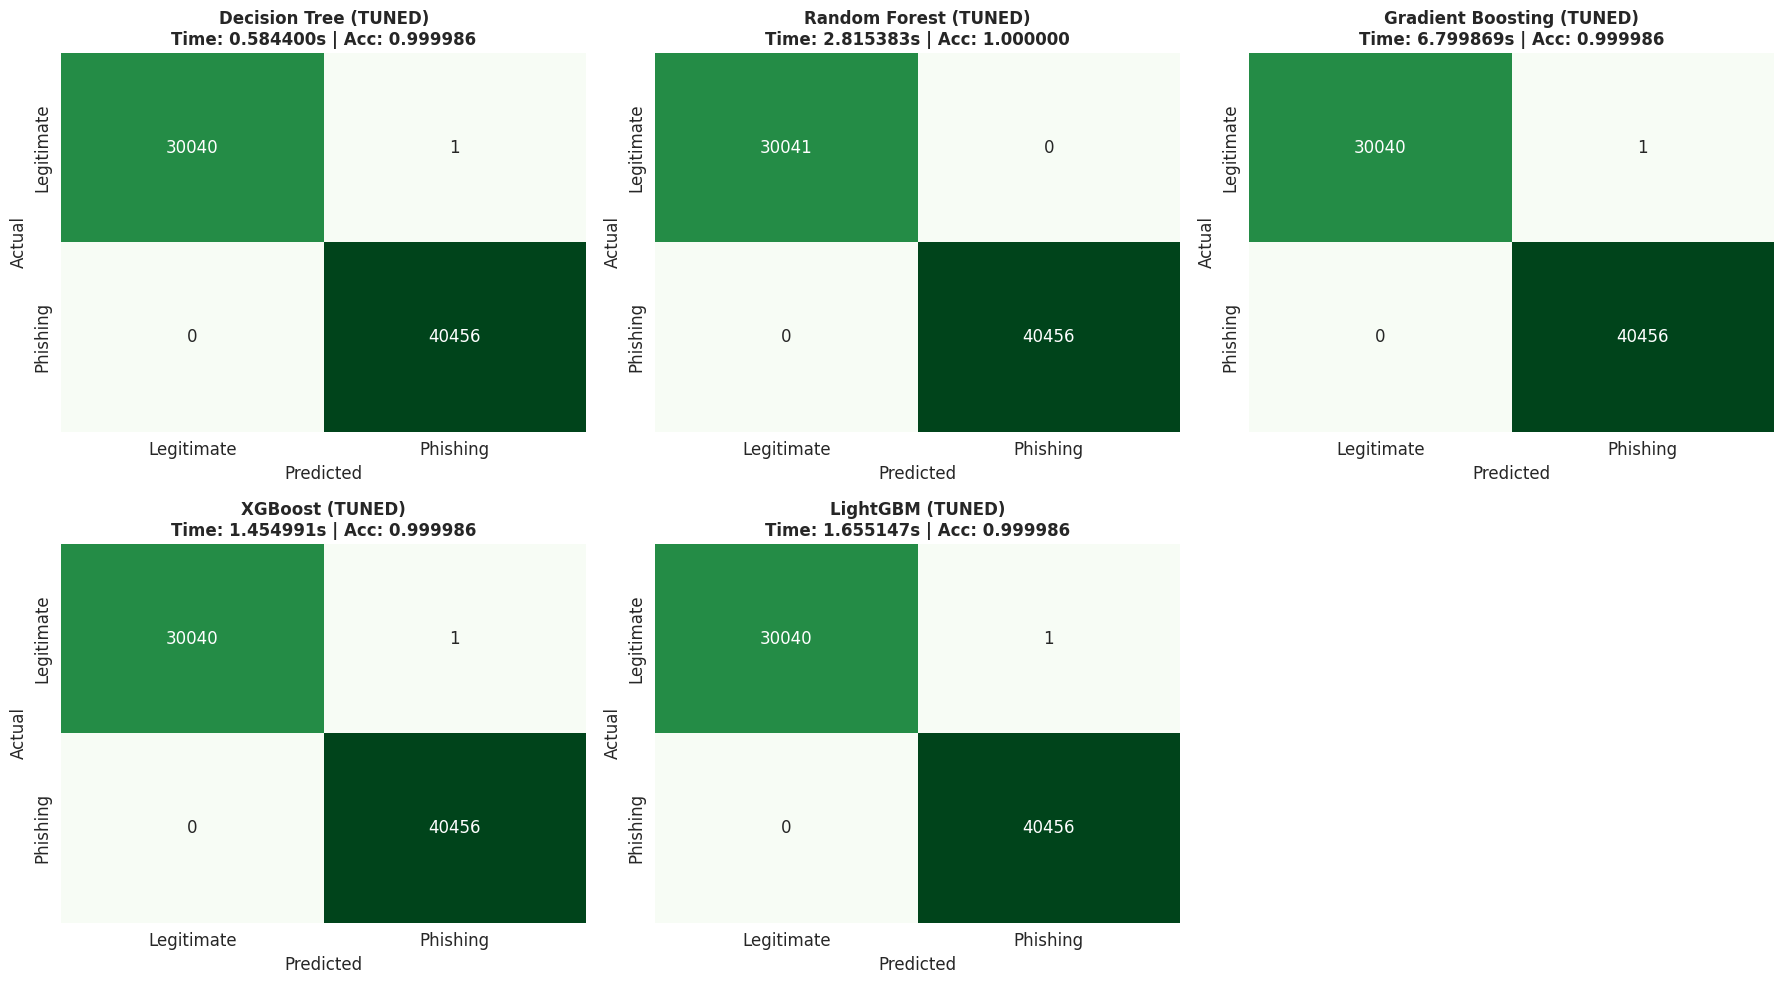

In [30]:
print("=== VALIDASI SKENARIO 2: CONFUSION MATRIX & SPEED TEST ===")

tuned_models = {
    "Decision Tree": DecisionTreeClassifier(
        random_state=42,
        criterion='gini',
        max_depth=3,
        min_samples_leaf=1
    ),
    "Random Forest": RandomForestClassifier(
        random_state=42, n_jobs=-1,
        min_samples_leaf=1,
        n_estimators=20,
        max_depth=10
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        random_state=42,
        learning_rate=0.1,
        n_estimators=10,
        max_depth=3
    ),
    "XGBoost": XGBClassifier(
        random_state=42, eval_metric='logloss', n_jobs=-1,
        n_estimators=10,
        max_depth=3,
        learning_rate=0.1
    ),
    "LightGBM": lgb.LGBMClassifier(
        random_state=42, n_jobs=-1, verbose=-1,
        n_estimators=10,
        max_depth=3,
        learning_rate=0.1
    )

    }
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

results_tuned = []

for i, (name, model) in enumerate(tuned_models.items()):
    # Training & Timing
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time

    # Testing
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plotting
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[i]) # Pakai warna hijau biar beda sama Skenario 1

    axes[i].set_title(f"{name} (TUNED)\nTime: {train_time:.6f}s | Acc: {acc:.6f}", fontsize=12, fontweight='bold')
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
    axes[i].set_xticklabels(['Legitimate', 'Phishing'])
    axes[i].set_yticklabels(['Legitimate', 'Phishing'])

    results_tuned.append({
        "Model": name,
        "Tuned Time (s)": train_time,
        "Tuned Accuracy": acc
    })

# Hapus subplot kosong
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

=== PERBANDINGAN BASELINE (Skenario 1) vs TUNED (Skenario 2) ===

Tabel Perbandingan Performa (Efisiensi Waktu):


,Model,Base_Acc,Tuned_Acc,Base_Time,Tuned_Time,Time_Reduction (%),Speedup (x)
0,Decision Tree,1.0,0.999986,0.663803,0.584400,11.961922,1.135872
1,XGBoost,1.0,0.999986,2.368918,1.454991,38.579918,1.628132
2,LightGBM,1.0,0.999986,4.473355,1.655147,62.999880,2.702694
3,Random Forest,1.0,1.000000,14.495530,2.815383,80.577580,5.148689
4,Gradient Boosting,1.0,0.999986,59.574991,6.799869,88.586034,8.761197


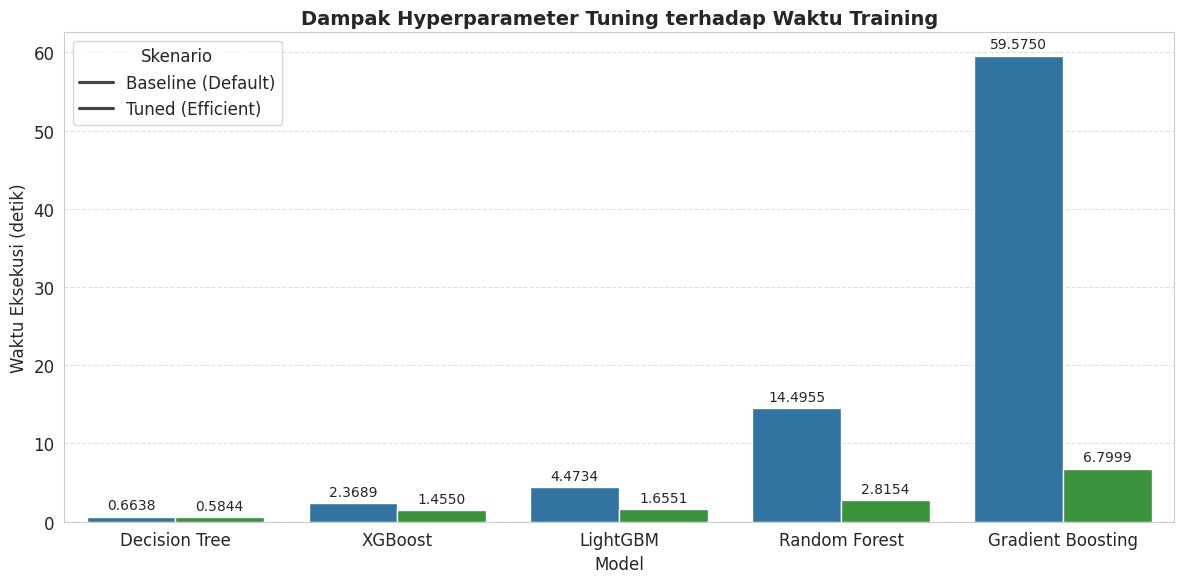

In [31]:
print("=== PERBANDINGAN BASELINE (Skenario 1) vs TUNED (Skenario 2) ===")
try:
    df_base_prep = df_baseline[['Model', 'Accuracy', 'Training Time (s)']].copy()

    df_base_prep = df_base_prep.rename(columns={
        'Accuracy': 'Base_Acc',
        'Training Time (s)': 'Base_Time'
    })
except NameError:
    print("ERROR: Variabel 'df_baseline' tidak ditemukan.")
    print("Pastikan Anda sudah menjalankan kode Skenario 1 yang baru.")

df_tune_prep = pd.DataFrame(results_tuned)[['Model', 'Tuned Accuracy', 'Tuned Time (s)']].copy()

df_tune_prep = df_tune_prep.rename(columns={
    'Tuned Accuracy': 'Tuned_Acc',
    'Tuned Time (s)': 'Tuned_Time'
})

df_compare = pd.merge(df_base_prep, df_tune_prep, on='Model')

# Persentase Pengurangan Waktu
df_compare['Time_Reduction (%)'] = ((df_compare['Base_Time'] - df_compare['Tuned_Time']) / df_compare['Base_Time']) * 100

# Speedup
df_compare['Speedup (x)'] = df_compare['Base_Time'] / df_compare['Tuned_Time']

df_compare = df_compare[['Model', 'Base_Acc', 'Tuned_Acc', 'Base_Time', 'Tuned_Time', 'Time_Reduction (%)', 'Speedup (x)']]

print("\nTabel Perbandingan Performa (Efisiensi Waktu):")
display(df_compare.round(6))

melted_df = df_compare.melt(id_vars='Model', value_vars=['Base_Time', 'Tuned_Time'], var_name='Scenario', value_name='Time (s)')

plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Model', y='Time (s)', hue='Scenario', palette=['#1f77b4', '#2ca02c'])

plt.title('Dampak Hyperparameter Tuning terhadap Waktu Training', fontsize=14, fontweight='bold')
plt.ylabel('Waktu Eksekusi (detik)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.legend(title='Skenario', labels=['Baseline (Default)', 'Tuned (Efficient)'])
plt.grid(axis='y', linestyle='--', alpha=0.6)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.4f', padding=3, fontsize=10)

plt.tight_layout()
plt.show()

# Skenario 3: Feature Reduction

## Drop Redundant Features (dari EDA sebelumnya)

In [ ]:
redundant_drop = [
    'TLDLegitimateProb',    # Redundan dengan TLD (kita simpan TLD_Freq)
    'NoOfLettersInURL',     # Redundan dengan URLLength
    'URLTitleMatchScore'    # Redundan dengan DomainTitleMatchScore
]

# Cek dulu agar aman
existing_drop = [c for c in redundant_drop if c in X_train.columns]

# Kita buat variabel input khusus RFE (agar X_train asli aman)
X_train_rfe = X_train.drop(columns=existing_drop, errors='ignore')
X_test_rfe = X_test.drop(columns=existing_drop, errors='ignore')

if existing_drop:
    print(f"Menghapus {len(existing_drop)} fitur redundan:")
    print(f" - {existing_drop}")
    print(f"Sisa fitur untuk diproses: {X_train_rfe.shape[1]}")


Menghapus 3 fitur redundan:
 - ['TLDLegitimateProb', 'NoOfLettersInURL', 'URLTitleMatchScore']
Sisa fitur untuk diproses: 48


## Feature Importance VS PCA

### Random Forest

#### Feature Importance

 => Top 3 Fitur: Akurasi 0.999915
 => Top 5 Fitur: Akurasi 0.999972
 => Top 7 Fitur: Akurasi 0.999972
 => Top 10 Fitur: Akurasi 0.999986
 => Top 15 Fitur: Akurasi 1.000000
 => Top 20 Fitur: Akurasi 0.999986
 => Top 25 Fitur: Akurasi 1.000000
 => Top 30 Fitur: Akurasi 1.000000
 => Top 48 Fitur: Akurasi 1.000000


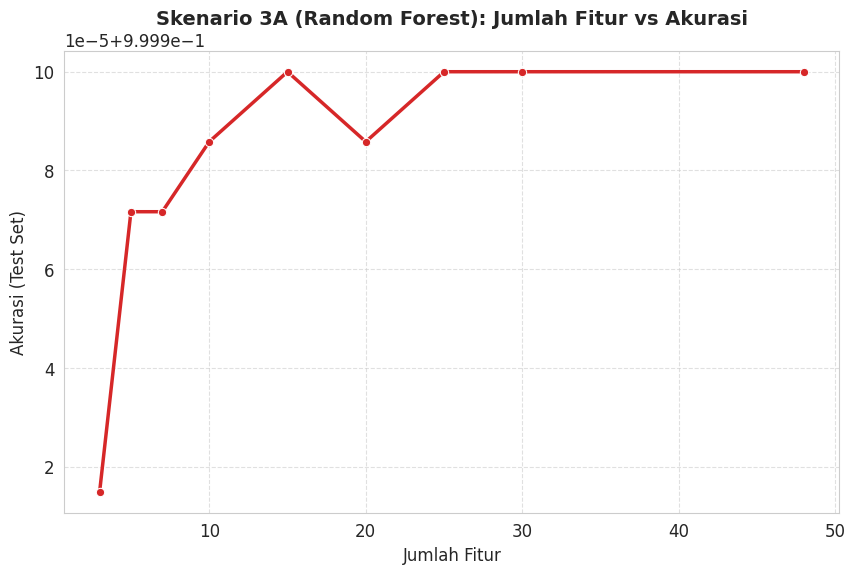

In [ ]:
rf_selector = RandomForestClassifier(random_state=42, n_jobs=-1, min_samples_leaf=1, n_estimators=20, max_depth=10)

n_features_options = [3, 5, 7, 10, 15, 20, 25, 30, X_train_rfe.shape[1]]
rfe_results = []

for n in n_features_options:
    if n > X_train_rfe.shape[1]: continue

    # RFE: Pilih n fitur terbaik
    rfe = RFE(estimator=rf_selector, n_features_to_select=n, step=1)
    rfe.fit(X_train_rfe, y_train)

    # Ambil nama fitur terpilih
    selected_cols = X_train_rfe.columns[rfe.support_]

    # Latih ulang model kecil
    X_train_small = X_train_rfe[selected_cols]
    X_test_small = X_test_rfe[selected_cols]

    rf_selector.fit(X_train_small, y_train)

    # Hitung Akurasi
    acc = rf_selector.score(X_test_small, y_test)

    # Simpan hasil
    rfe_results.append({
        "Jumlah Fitur": n,
        "Akurasi": acc,
        "Fitur Terpilih": list(selected_cols)
    })

    print(f" => Top {n} Fitur: Akurasi {acc:.6f}")

df_rfe = pd.DataFrame(rfe_results)

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_rfe, x='Jumlah Fitur', y='Akurasi', marker='o', linewidth=2.5, color='#d62728')
plt.title('Skenario 3A (Random Forest): Jumlah Fitur vs Akurasi', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Fitur', fontsize=12)
plt.ylabel('Akurasi (Test Set)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
best_scenario = df_rfe.iloc[4]

print(f"=== REKOMENDASI FITUR YANG DIAMBIL (RANDOM FOREST)===")
print(f"Akurasi: {best_scenario['Akurasi']:.6f}")
print("Daftar Fitur Inti:")
for i, f in enumerate(best_scenario['Fitur Terpilih'], 1):
    print(f"{i}. {f}")

=== REKOMENDASI FITUR YANG DIAMBIL (RANDOM FOREST)===
Akurasi: 1.000000
Daftar Fitur Inti:
1. URLLength
2. URLSimilarityIndex
3. NoOfSubDomain
4. DegitRatioInURL
5. NoOfOtherSpecialCharsInURL
6. IsHTTPS
7. LineOfCode
8. LargestLineLength
9. HasSocialNet
10. HasCopyrightInfo
11. NoOfImage
12. NoOfCSS
13. NoOfJS
14. NoOfSelfRef
15. NoOfExternalRef


#### PCA

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_rfe)
X_test_scaled = scaler.transform(X_test_rfe)

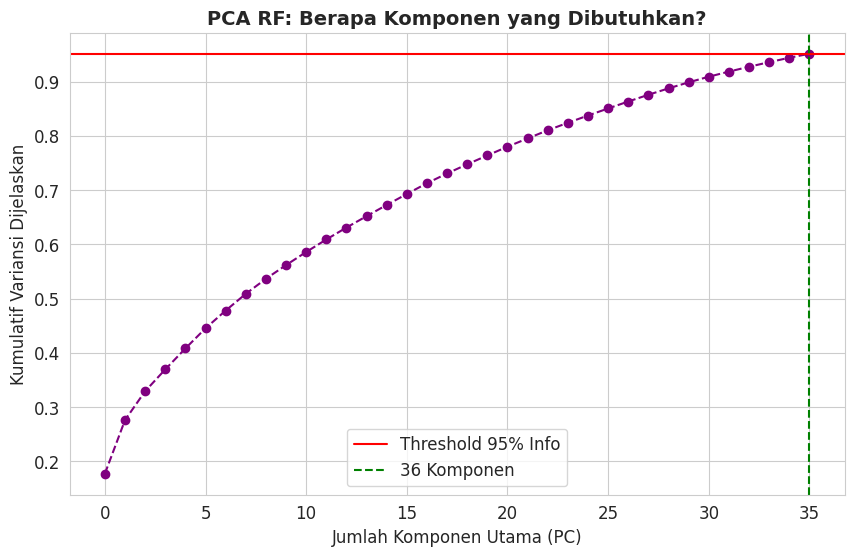

Untuk mempertahankan 95% informasi, dibutuhkan: 36 Komponen (dari total 48 fitur asli).


In [ ]:
# Menentukan Jumlah Komponen menggunakan Elbow Method
# Kita coba pertahankan 95% variansi informasi
pca_test = PCA(n_components=0.95)
pca_test.fit(X_train_scaled)

n_components_95 = pca_test.n_components_

# Visualisasi Cumulative Variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_test.explained_variance_ratio_), marker='o', linestyle='--', color='purple')
plt.xlabel('Jumlah Komponen Utama (PC)', fontsize=12)
plt.ylabel('Kumulatif Variansi Dijelaskan', fontsize=12)
plt.title('PCA RF: Berapa Komponen yang Dibutuhkan?', fontsize=14, fontweight='bold')
plt.axhline(y=0.95, color='r', linestyle='-', label='Threshold 95% Info')
plt.axvline(x=n_components_95-1, color='g', linestyle='--', label=f'{n_components_95} Komponen')
plt.legend()
plt.grid(True)
plt.show()

print(f"Untuk mempertahankan 95% informasi, dibutuhkan: {n_components_95} Komponen (dari total {X_train_rfe.shape[1]} fitur asli).")

In [ ]:
print(f"Melatih Model dengan {n_components_95} Komponen PCA...")

# Transformasi data ke dimensi baru
pca_final = PCA(n_components=n_components_95)
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

# Latih Random Forest (Pakai parameter Tuned Skenario 2 Anda)
# Misal: n_estimators=10, max_depth=5
rf_pca = RandomForestClassifier(random_state=42, n_jobs=-1, min_samples_leaf=1, n_estimators=20, max_depth=10)

# Training time
start_pca = time.time()
rf_pca.fit(X_train_pca, y_train)
time_pca = time.time() - start_pca

# Testing
acc_pca = rf_pca.score(X_test_pca, y_test)

print(f"--- HASIL PCA Random Forest ---")
print(f"Jumlah Fitur Baru (PC): {n_components_95}")
print(f"Akurasi PCA           : {acc_pca:.6f}")
print(f"Waktu Training PCA    : {time_pca:.4f} detik")

Melatih Model dengan 36 Komponen PCA...
--- HASIL PCA Random Forest ---
Jumlah Fitur Baru (PC): 36
Akurasi PCA           : 0.997730
Waktu Training PCA    : 26.1772 detik


#### RFE VS PCA

In [ ]:
# RFE VS PCA
try:
    print("=== PERBANDINGAN: RFE (Seleksi) vs PCA (Transformasi) Random Forest ===")
    print(f"1. RFE (Fitur Asli) -> Jumlah: {best_scenario['Jumlah Fitur']} | Akurasi: {best_scenario['Akurasi']:.6f}")
    print(f"2. PCA (Fitur Baru) -> Jumlah: {n_components_95} | Akurasi: {acc_pca:.6f}")

    if best_scenario['Jumlah Fitur'] < n_components_95:
        print("\nKESIMPULAN SEMENTARA: RFE Lebih Efisien (Butuh lebih sedikit fitur).")
    else:
        print("\nKESIMPULAN SEMENTARA: PCA Lebih Efisien (Lebih memadatkan data).")
except NameError:
    print("\n(Jalankan kode RFE sebelumnya untuk melihat perbandingan otomatis)")

=== PERBANDINGAN: RFE (Seleksi) vs PCA (Transformasi) Random Forest ===
1. RFE (Fitur Asli) -> Jumlah: 15 | Akurasi: 1.000000
2. PCA (Fitur Baru) -> Jumlah: 36 | Akurasi: 0.997730

KESIMPULAN SEMENTARA: RFE Lebih Efisien (Butuh lebih sedikit fitur).


### XGBoost

#### Feature Importance

 -> Top 3 Fitur: Akurasi 0.999986
 -> Top 5 Fitur: Akurasi 0.999986
 -> Top 7 Fitur: Akurasi 0.999986
 -> Top 10 Fitur: Akurasi 0.999986
 -> Top 15 Fitur: Akurasi 0.999986
 -> Top 20 Fitur: Akurasi 0.999986
 -> Top 30 Fitur: Akurasi 0.999986
 -> Top 48 Fitur: Akurasi 0.999986


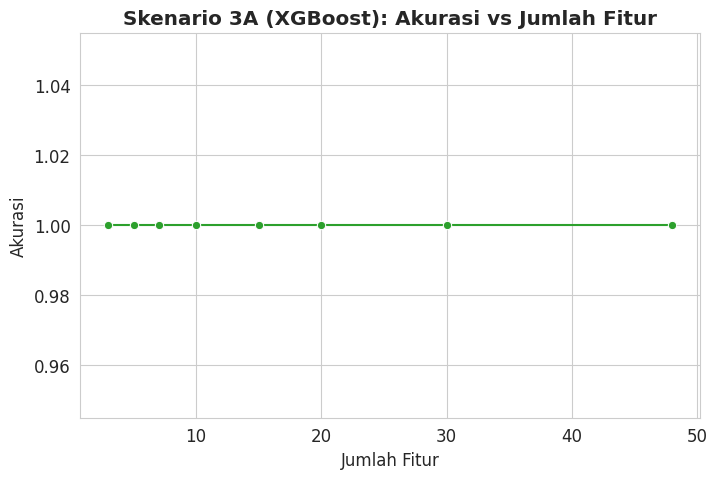

In [ ]:
xgb_selector = XGBClassifier(
    n_estimators=10,
    max_depth=3,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1
)

# 3. Loop RFE
n_features_options = [3, 5, 7, 10, 15, 20, 30, X_train_rfe.shape[1]]
rfe_results_xgb = []

for n in n_features_options:
    if n > X_train_rfe.shape[1]: continue

    # RFE Process
    rfe = RFE(estimator=xgb_selector, n_features_to_select=n, step=1)
    rfe.fit(X_train_rfe, y_train)

    selected_cols = X_train_rfe.columns[rfe.support_]

    # Test Accuracy
    xgb_selector.fit(X_train_rfe[selected_cols], y_train)
    acc = xgb_selector.score(X_test_rfe[selected_cols], y_test)

    rfe_results_xgb.append({
        "Jumlah Fitur": n,
        "Akurasi": acc,
        "Fitur Terpilih": list(selected_cols)
    })
    print(f" -> Top {n} Fitur: Akurasi {acc:.6f}")

# 4. Visualisasi Grafik XGBoost
df_rfe_xgb = pd.DataFrame(rfe_results_xgb)

plt.figure(figsize=(8, 5))
sns.lineplot(data=df_rfe_xgb, x='Jumlah Fitur', y='Akurasi', marker='o', color='#2ca02c')
plt.title('Skenario 3A (XGBoost): Akurasi vs Jumlah Fitur', fontweight='bold')
plt.grid(True)
plt.show()

In [ ]:
# 5. Rekomendasi Fitur Final (XGBoost Version)
best_xgb = df_rfe_xgb.iloc[4]

print(f"\n=== REKOMENDASI FITUR YANG DIPAKAI (XGBOOST) ===")
print(f"Akurasi: {best_xgb['Akurasi']:.6f}")
print("Daftar Fitur Inti:")
for i, f in enumerate(best_xgb['Fitur Terpilih'], 1):
    print(f"{i}. {f}")


=== REKOMENDASI FITUR YANG DIPAKAI (XGBOOST) ===
Akurasi: 0.999986
Daftar Fitur Inti:
1. URLSimilarityIndex
2. IsHTTPS
3. LineOfCode
4. HasPasswordField
5. Bank
6. Pay
7. Crypto
8. HasCopyrightInfo
9. NoOfImage
10. NoOfCSS
11. NoOfJS
12. NoOfSelfRef
13. NoOfEmptyRef
14. NoOfExternalRef
15. TLD_Freq


#### PCA

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_rfe)
X_test_scaled = scaler.transform(X_test_rfe)

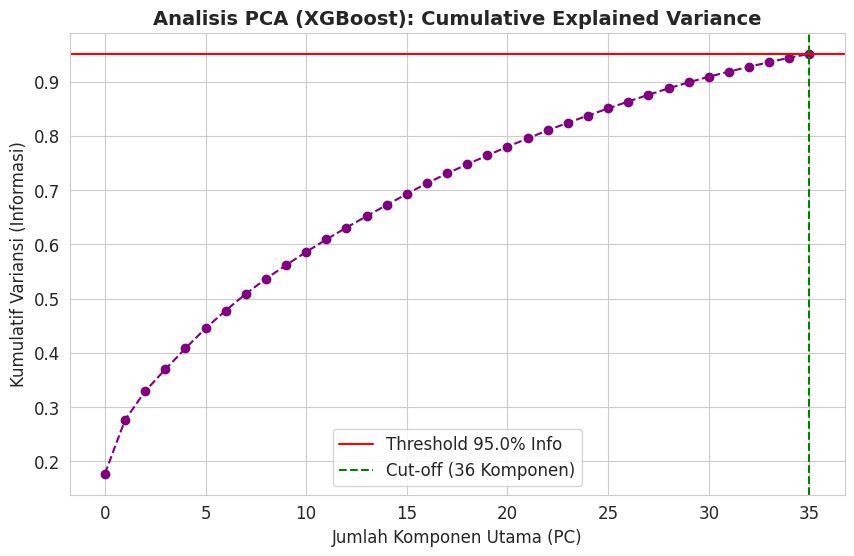

Komponen PCA yang dibutuhkan (95% Info): 36


In [ ]:
pca_full = PCA(n_components=0.95)
pca_full.fit(X_train_scaled)

# Hitung kumulatif variansi (Seberapa banyak info yang tersimpan)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
n_components_total = len(cumulative_variance)

plt.figure(figsize=(10, 6))

# Plot Garis Kumulatif
plt.plot(cumulative_variance, marker='o', linestyle='--', color='purple')

# Tambahkan Garis Target 95%
target_variance = 0.95
# Cari indeks di mana variansi pertama kali tembus 95%
n_components_95 = np.argmax(cumulative_variance >= target_variance) + 1

plt.axhline(y=0.95, color='r', linestyle='-', label=f'Threshold {target_variance*100}% Info')
plt.axvline(x=n_components_95-1, color='g', linestyle='--', label=f'Cut-off ({n_components_95} Komponen)')

# Hiasan Grafik
plt.title('Analisis PCA (XGBoost): Cumulative Explained Variance', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Komponen Utama (PC)', fontsize=12)
plt.ylabel('Kumulatif Variansi (Informasi)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
print(f"Komponen PCA yang dibutuhkan (95% Info): {n_components_95}")



In [ ]:
# Transformasi data
pca_final = PCA(n_components=n_components_95)
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

# Setup Model XGBoost (Parameter Efisien Skenario 2)
model_pca_xgb = XGBClassifier(
    n_estimators=20,
    max_depth=3,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1
)

# Training
start_time = time.time()
model_pca_xgb.fit(X_train_pca, y_train)
train_time_pca = time.time() - start_time

# Testing
acc_pca_xgb = model_pca_xgb.score(X_test_pca, y_test)

print(f"\n--- HASIL PCA (XGBoost) ---")
print(f"Jumlah Fitur Baru (PC): {n_components_95}")
print(f"Akurasi PCA           : {acc_pca_xgb:.6f}")
print(f"Waktu Training        : {train_time_pca:.4f} detik")


--- HASIL PCA (XGBoost) ---
Jumlah Fitur Baru (PC): 36
Akurasi PCA           : 0.992794
Waktu Training        : 1.3753 detik


#### RFA VS PCA

In [ ]:
if 'best_xgb' in locals():
    print("\n=== KESIMPULAN: RFE vs PCA untuk XGBoost ===")
    print(f"1. RFE (Fitur Asli) -> Butuh {best_xgb['Jumlah Fitur']} Fitur | Akurasi: {best_xgb['Akurasi']:.6f}")
    print(f"2. PCA (Fitur Baru) -> Butuh {n_components_95} Komponen | Akurasi: {acc_pca_xgb:.6f}")

    if best_xgb['Jumlah Fitur'] < n_components_95:
        print("\nPEMENANG: RFE (Recursive Feature Elimination)")
        print("Alasan: RFE mencapai akurasi tinggi dibandingkan PCA.")
    else:
        print("\nPEMENANG: PCA")
        print("Alasan: PCA mampu memadatkan informasi lebih efisien.")


=== KESIMPULAN: RFE vs PCA untuk XGBoost ===
1. RFE (Fitur Asli) -> Butuh 15 Fitur | Akurasi: 0.999986
2. PCA (Fitur Baru) -> Butuh 36 Komponen | Akurasi: 0.992794

PEMENANG: RFE (Recursive Feature Elimination)
Alasan: RFE mencapai akurasi tinggi dibandingkan PCA.


# Evaluasi Akhir

## Features and Params

In [ ]:
rf_features = [
    'URLLength',
    'URLSimilarityIndex',
    'NoOfSubDomain',
    'DegitRatioInURL',
    'NoOfOtherSpecialCharsInURL',
    'IsHTTPS',
    'LineOfCode',
    'LargestLineLength',
    'HasSocialNet',
    'HasCopyrightInfo',
    'NoOfImage',
    'NoOfCSS',
    'NoOfJS',
    'NoOfSelfRef',
    'NoOfExternalRef'
]

rf_params = {
    'n_estimators': 20,
    'max_depth': 10,
    'min_samples_leaf': 1,
    'n_jobs': -1,
    'random_state': 42
}

print("Random Forest features and parameters defined.")

Random Forest features and parameters defined.


In [ ]:
xgb_features = [
    'URLSimilarityIndex',
    'IsHTTPS',
    'LineOfCode',
    'HasPasswordField',
    'Bank',
    'Pay',
    'Crypto',
    'HasCopyrightInfo',
    'NoOfImage',
    'NoOfCSS',
    'NoOfJS',
    'NoOfSelfRef',
    'NoOfEmptyRef',
    'NoOfExternalRef',
    'TLD_Freq'
]

xgb_params = {
    'n_estimators': 10,
    'max_depth': 3,
    'learning_rate': 0.1,
    'eval_metric': 'logloss',
    'n_jobs': -1,
    'random_state': 42
}

print("XGBoost features and parameters defined.")

XGBoost features and parameters defined.


## Final Test

In [ ]:
X_train_rf_15_kf = X_train[rf_features]
print(f"Shape of X_train_rf_15_kf: {X_train_rf_15_kf.shape}")
print(f"Columns in X_train_rf_15_kf: {X_train_rf_15_kf.columns.tolist()}")

Shape of X_train_rf_15_kf: (164490, 15)
Columns in X_train_rf_15_kf: ['URLLength', 'URLSimilarityIndex', 'NoOfSubDomain', 'DegitRatioInURL', 'NoOfOtherSpecialCharsInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasSocialNet', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfExternalRef']


In [ ]:
print("=== K-FOLD CROSS VALIDATION: RANDOM FOREST ===")

# Initialize Random Forest model with tuned parameters
rf_model_kf = RandomForestClassifier(**rf_params)

# Perform 5-fold Stratified K-Fold Cross Validation for Random Forest
print(f"Melakukan 5-Fold Stratified Cross Validation untuk Random Forest dengan {len(rf_features)} fitur...")
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_cv_scores = cross_val_score(rf_model_kf, X_train_rf_15_kf, y_train, cv=kf, scoring='accuracy', n_jobs=-1)

# Display results for Random Forest
print("\n=== HASIL K-FOLD CROSS VALIDATION (RANDOM FOREST) ===")
print("Akurasi untuk setiap fold:")
for i, score in enumerate(rf_cv_scores, start=1):
    print(f"  - Akurasi fold {i}: {score:.6f}")

rf_mean_accuracy = rf_cv_scores.mean()
rf_std_accuracy = rf_cv_scores.std()
print(f"Akurasi Rata-rata (Random Forest): {rf_mean_accuracy:.6f}")
print(f"Standar Deviasi Akurasi (Random Forest): {rf_std_accuracy:.6f}")

=== K-FOLD CROSS VALIDATION: RANDOM FOREST ===
Melakukan 5-Fold Stratified Cross Validation untuk Random Forest dengan 15 fitur...

=== HASIL K-FOLD CROSS VALIDATION (RANDOM FOREST) ===
Akurasi untuk setiap fold:
  - Akurasi fold 1: 1.000000
  - Akurasi fold 2: 1.000000
  - Akurasi fold 3: 0.999970
  - Akurasi fold 4: 1.000000
  - Akurasi fold 5: 1.000000
Akurasi Rata-rata (Random Forest): 0.999994
Standar Deviasi Akurasi (Random Forest): 0.000012


In [ ]:
# Extract the 15 best features for XGBoost (from 'xgb_features' variable)
X_train_xgb_15_kf = X_train[xgb_features]
print(f"Shape of X_train_xgb_15_kf: {X_train_xgb_15_kf.shape}")
print(f"Columns in X_train_xgb_15_kf: {X_train_xgb_15_kf.columns.tolist()}")

Shape of X_train_xgb_15_kf: (164490, 15)
Columns in X_train_xgb_15_kf: ['URLSimilarityIndex', 'IsHTTPS', 'LineOfCode', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'TLD_Freq']


In [ ]:
print("\n" + "="*70)
print("=== K-FOLD CROSS VALIDATION: XGBOOST ===")

# Initialize XGBoost model with tuned parameters
xgb_model_kf = XGBClassifier(**xgb_params)

# Perform 5-fold Stratified K-Fold Cross Validation for XGBoost
print(f"Melakukan 5-Fold Stratified Cross Validation untuk XGBoost dengan {len(xgb_features)} fitur...")
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb_cv_scores = cross_val_score(xgb_model_kf, X_train_xgb_15_kf, y_train, cv=kf, scoring='accuracy', n_jobs=-1)

# Display results for XGBoost
print("\n=== HASIL K-FOLD CROSS VALIDATION (XGBOOST) ===")
print("Akurasi untuk setiap fold:")
for i, score in enumerate(xgb_cv_scores, start=1):
    print(f"  - Akurasi fold {i}: {score:.6f}")

xgb_mean_accuracy = xgb_cv_scores.mean()
xgb_std_accuracy = xgb_cv_scores.std()
print(f"Akurasi Rata-rata (XGBoost): {xgb_mean_accuracy:.6f}")
print(f"Standar Deviasi Akurasi (XGBoost): {xgb_std_accuracy:.6f}")


=== K-FOLD CROSS VALIDATION: XGBOOST ===
Melakukan 5-Fold Stratified Cross Validation untuk XGBoost dengan 15 fitur...

=== HASIL K-FOLD CROSS VALIDATION (XGBOOST) ===
Akurasi untuk setiap fold:
  - Akurasi fold 1: 1.000000
  - Akurasi fold 2: 1.000000
  - Akurasi fold 3: 0.999970
  - Akurasi fold 4: 1.000000
  - Akurasi fold 5: 1.000000
Akurasi Rata-rata (XGBoost): 0.999994
Standar Deviasi Akurasi (XGBoost): 0.000012


In [ ]:
print("\n" + "="*70)
print("=== PERBANDINGAN K-FOLD CROSS VALIDATION RESULTS ===")

# Extract Tuned Time for Random Forest and XGBoost from results_tuned
rf_tuned_time = 0
xgb_tuned_time = 0
for res in results_tuned:
    if res['Model'] == 'Random Forest':
        rf_tuned_time = res['Tuned Time (s)']
    elif res['Model'] == 'XGBoost':
        xgb_tuned_time = res['Tuned Time (s)']

cv_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'Average Accuracy (CV)': [rf_mean_accuracy, xgb_mean_accuracy],
    'Std Dev Accuracy (CV)': [rf_std_accuracy, xgb_std_accuracy],
    'Tuned Training Time (s)': [rf_tuned_time, xgb_tuned_time] # Add this column
})
display(cv_comparison)

if rf_mean_accuracy > xgb_mean_accuracy:
    best_model_name = "Random Forest"
    best_mean_acc = rf_mean_accuracy
    best_std_acc = rf_std_accuracy
    best_features = rf_features
    best_training_time = rf_tuned_time
elif xgb_mean_accuracy > rf_mean_accuracy:
    best_model_name = "XGBoost"
    best_mean_acc = xgb_mean_accuracy
    best_std_acc = xgb_std_accuracy
    best_features = xgb_features
    best_training_time = xgb_tuned_time
else:
    # If accuracies are equal, consider standard deviation (lower is better)
    if rf_std_accuracy < xgb_std_accuracy:
        best_model_name = "Random Forest"
        best_mean_acc = rf_mean_accuracy
        best_std_acc = rf_std_accuracy
        best_features = rf_features
        best_training_time = rf_tuned_time
    elif xgb_std_accuracy < rf_std_accuracy:
        best_model_name = "XGBoost"
        best_mean_acc = xgb_mean_accuracy
        best_std_acc = xgb_std_accuracy
        best_features = xgb_features
        best_training_time = xgb_tuned_time
    else:
        # If accuracies and std dev are equal, use training time as tie-breaker (lower is better)
        if rf_tuned_time < xgb_tuned_time:
            best_model_name = "Random Forest"
            best_mean_acc = rf_mean_accuracy
            best_std_acc = rf_std_accuracy
            best_features = rf_features
            best_training_time = rf_tuned_time
        elif xgb_tuned_time < rf_tuned_time:
            best_model_name = "XGBoost"
            best_mean_acc = xgb_mean_accuracy
            best_std_acc = xgb_std_accuracy
            best_features = xgb_features
            best_training_time = xgb_tuned_time
        else:
            best_model_name = "Both models perform equally well"
            best_mean_acc = rf_mean_accuracy
            best_std_acc = rf_std_accuracy
            best_features = "Random Forest features" # Arbitrarily pick one if both are perfect
            best_training_time = rf_tuned_time


=== PERBANDINGAN K-FOLD CROSS VALIDATION RESULTS ===


,Model,Average Accuracy (CV),Std Dev Accuracy (CV),Tuned Training Time (s)
0,Random Forest,0.999994,0.000012,3.956548
1,XGBoost,0.999994,0.000012,0.971743


In [ ]:
print(f"FINAL KESIMPULAN DARI K-FOLD CROSS VALIDATION:")
print(f"Model terbaik berdasarkan K-Fold CV adalah {best_model_name}.")
print(f"  - Akurasi Rata-rata: {best_mean_acc:.4f}")
print(f"  - Standar Deviasi Akurasi: {best_std_acc:.6f}")
print(f"  - Waktu Training Tuned: {best_training_time:.6f} detik")
if best_model_name != "Both models perform equally well":
    print(f"  - Dengan {len(best_features)} fitur RFE-selected:")
    for i, f in enumerate(best_features, 1):
        print(f"    {i}. {f}")
else:
    print(f"  - Kedua model mencapai akurasi sempurna ({rf_mean_accuracy:.6f}) dengan standar deviasi {rf_std_accuracy:.6f} dan waktu training yang sama ({best_training_time:.6f} detik).")
    print("  - Disarankan memilih model yang lebih cepat dalam pelatihan (seperti yang ditunjukkan dalam perbandingan sebelumnya).")

FINAL KESIMPULAN DARI K-FOLD CROSS VALIDATION:
Model terbaik berdasarkan K-Fold CV adalah XGBoost.
  - Akurasi Rata-rata: 1.0000
  - Standar Deviasi Akurasi: 0.000012
  - Waktu Training Tuned: 0.971743 detik
  - Dengan 15 fitur RFE-selected:
    1. URLSimilarityIndex
    2. IsHTTPS
    3. LineOfCode
    4. HasPasswordField
    5. Bank
    6. Pay
    7. Crypto
    8. HasCopyrightInfo
    9. NoOfImage
    10. NoOfCSS
    11. NoOfJS
    12. NoOfSelfRef
    13. NoOfEmptyRef
    14. NoOfExternalRef
    15. TLD_Freq


# Modeling menggunakan RFE

## Training

In [ ]:
xgb_rfe_features = best_xgb['Fitur Terpilih']
print(f"Fitur yang dipilih untuk XGBoost RFE: {xgb_rfe_features}")

Fitur yang dipilih untuk XGBoost RFE: ['URLSimilarityIndex', 'IsHTTPS', 'LineOfCode', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'TLD_Freq']


In [ ]:
X_train_rfe_final = X_train_rfe[xgb_rfe_features]
X_test_rfe_final = X_test_rfe[xgb_rfe_features]

print("=== DATA DENGAN FITUR TERPILIH (XGBOOST RFE) ===")
print(f"Shape X_train_rfe_final: {X_train_rfe_final.shape}")
print(f"Shape X_test_rfe_final: {X_test_rfe_final.shape}")
print("Fitur yang digunakan:")
print(X_train_rfe_final.columns.tolist())

=== DATA DENGAN FITUR TERPILIH (XGBOOST RFE) ===
Shape X_train_rfe_final: (164490, 15)
Shape X_test_rfe_final: (70497, 15)
Fitur yang digunakan:
['URLSimilarityIndex', 'IsHTTPS', 'LineOfCode', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'TLD_Freq']


In [ ]:
tuned_models_rfe = {
    "Decision Tree": DecisionTreeClassifier(
        random_state=42,
        criterion='gini',
        max_depth=3,
        min_samples_leaf=1
    ),
    "Random Forest": RandomForestClassifier(
        random_state=42, n_jobs=-1,
        min_samples_leaf=1,
        n_estimators=20,
        max_depth=10
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        random_state=42,
        learning_rate=0.1,
        n_estimators=10,
        max_depth=3
    ),
    "XGBoost": XGBClassifier(
        random_state=42, eval_metric='logloss', n_jobs=-1,
        n_estimators=10,
        max_depth=3,
        learning_rate=0.1
    ),
    "LightGBM": lgb.LGBMClassifier(
        random_state=42, n_jobs=-1, verbose=-1,
        n_estimators=10,
        max_depth=3,
        learning_rate=0.1
    )
}

=== MELATIH MODEL DENGAN FITUR RFE TERPILIH ===
Melatih Decision Tree dengan fitur RFE... Selesai!
Melatih Random Forest dengan fitur RFE... Selesai!
Melatih Gradient Boosting dengan fitur RFE... Selesai!
Melatih XGBoost dengan fitur RFE... Selesai!
Melatih LightGBM dengan fitur RFE... Selesai!


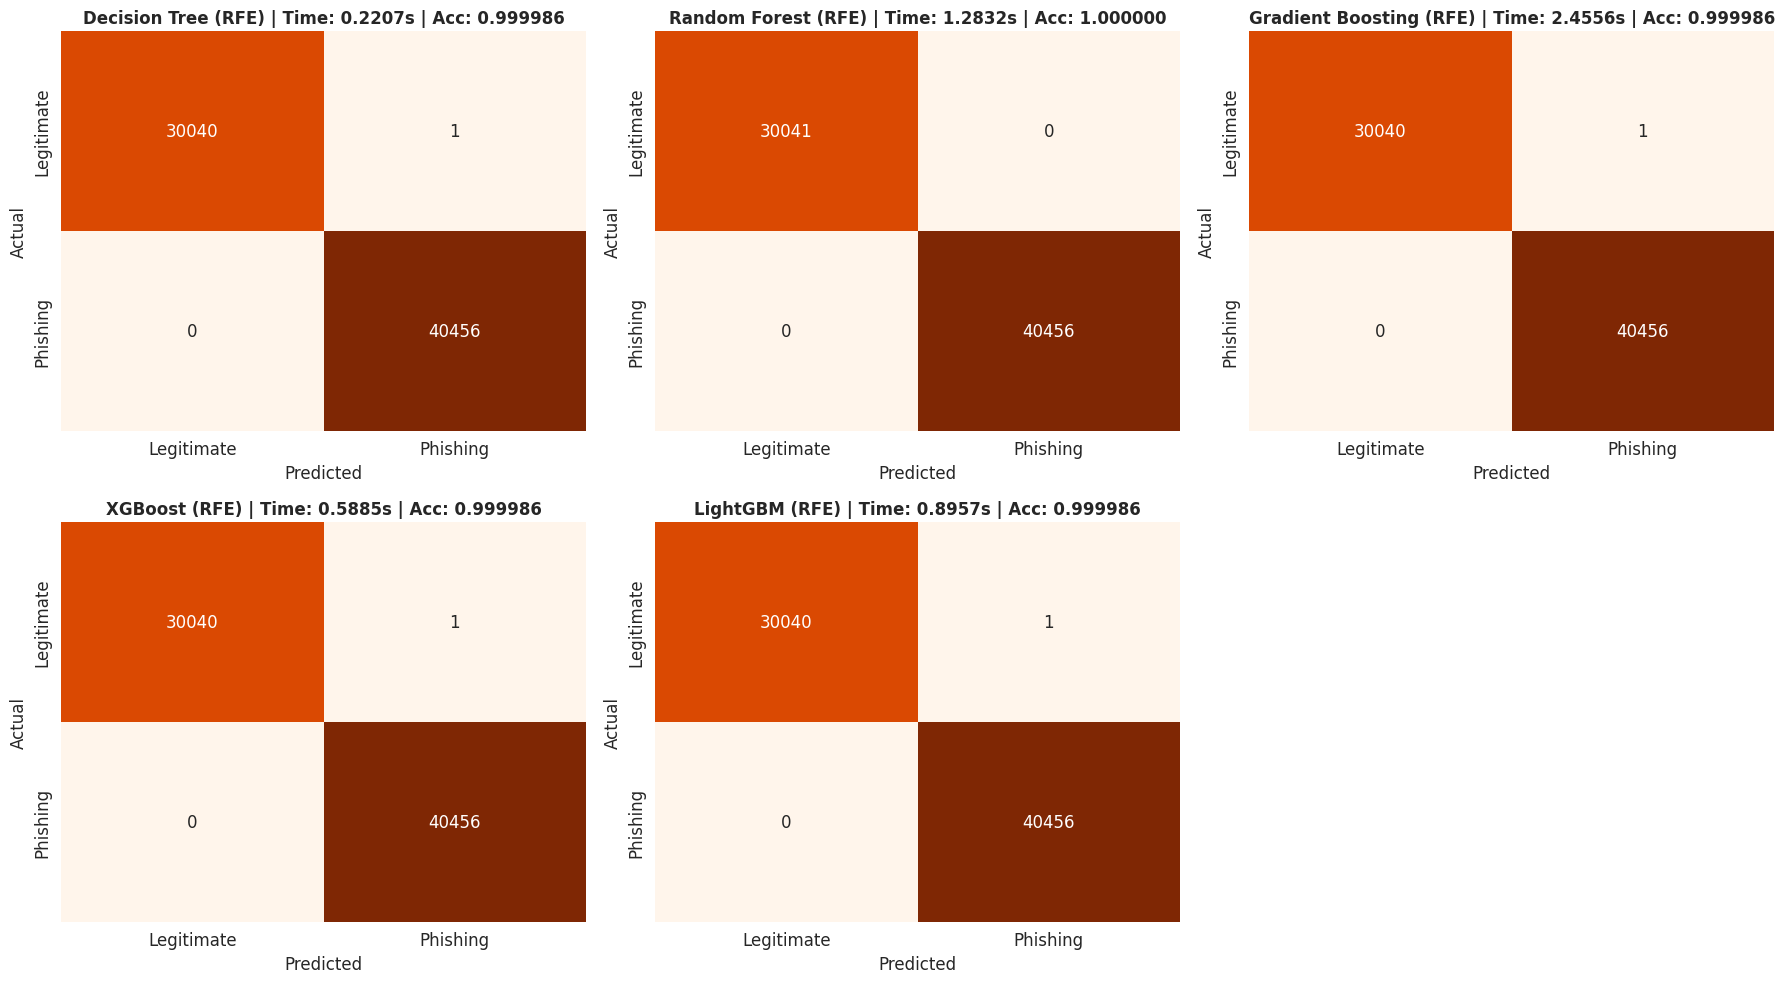

In [ ]:
print("=== MELATIH MODEL DENGAN FITUR RFE TERPILIH ===")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

results_tuned_rfe = []

for i, (name, model) in enumerate(tuned_models_rfe.items()):
    print(f"Melatih {name} dengan fitur RFE...", end=" ")
    start_time = time.time()
    model.fit(X_train_rfe_final, y_train)
    end_time = time.time()
    train_time = end_time - start_time

    y_pred = model.predict(X_test_rfe_final)
    acc = accuracy_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False, ax=axes[i]) # Pakai warna oranye untuk Skenario 3

    axes[i].set_title(f"{name} (RFE) | Time: {train_time:.4f}s | Acc: {acc:.6f}", fontsize=12, fontweight='bold')
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
    axes[i].set_xticklabels(['Legitimate', 'Phishing'])
    axes[i].set_yticklabels(['Legitimate', 'Phishing'])

    results_tuned_rfe.append({
        "Model": name,
        "RFE Time (s)": train_time,
        "RFE Accuracy": acc
    })
    print("Selesai!")

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

In [ ]:
print("=== PERBANDINGAN: TUNED TANPA RFE (Skenario 2) vs TUNED DENGAN RFE (Skenario 3) ===")

df_tuned_rfe_prep = pd.DataFrame(results_tuned_rfe)[['Model', 'RFE Accuracy', 'RFE Time (s)']].copy()
df_tuned_rfe_prep = df_tuned_rfe_prep.rename(columns={
    'RFE Accuracy': 'RFE_Acc',
    'RFE Time (s)': 'RFE_Time'
})

df_compare_rfe = pd.merge(df_tune_prep, df_tuned_rfe_prep, on='Model')

# Calculate performance improvements due to RFE
df_compare_rfe['Time_Reduction_RFE (%)'] = ((df_compare_rfe['Tuned_Time'] - df_compare_rfe['RFE_Time']) / df_compare_rfe['Tuned_Time']) * 100
df_compare_rfe['Speedup_RFE (x)'] = df_compare_rfe['Tuned_Time'] / df_compare_rfe['RFE_Time']

df_compare_rfe = df_compare_rfe[[
    'Model', 'Tuned_Acc', 'RFE_Acc', 'Tuned_Time', 'RFE_Time',
    'Time_Reduction_RFE (%)', 'Speedup_RFE (x)'
]]

print("\nTabel Perbandingan Performa (Efisiensi Waktu dengan RFE):")
display(df_compare_rfe.round(4))


=== PERBANDINGAN: TUNED TANPA RFE (Skenario 2) vs TUNED DENGAN RFE (Skenario 3) ===

Tabel Perbandingan Performa (Efisiensi Waktu dengan RFE):


,Model,Tuned_Acc,RFE_Acc,Tuned_Time,RFE_Time,Time_Reduction_RFE (%),Speedup_RFE (x)
0,Decision Tree,1.0,1.0,0.7677,0.2207,71.2492,3.4782
1,Random Forest,1.0,1.0,3.9565,1.2832,67.5687,3.0834
2,Gradient Boosting,1.0,1.0,6.5970,2.4556,62.7767,2.6865
3,XGBoost,1.0,1.0,0.9717,0.5885,39.4430,1.6513
4,LightGBM,1.0,1.0,2.1387,0.8957,58.1189,2.3877


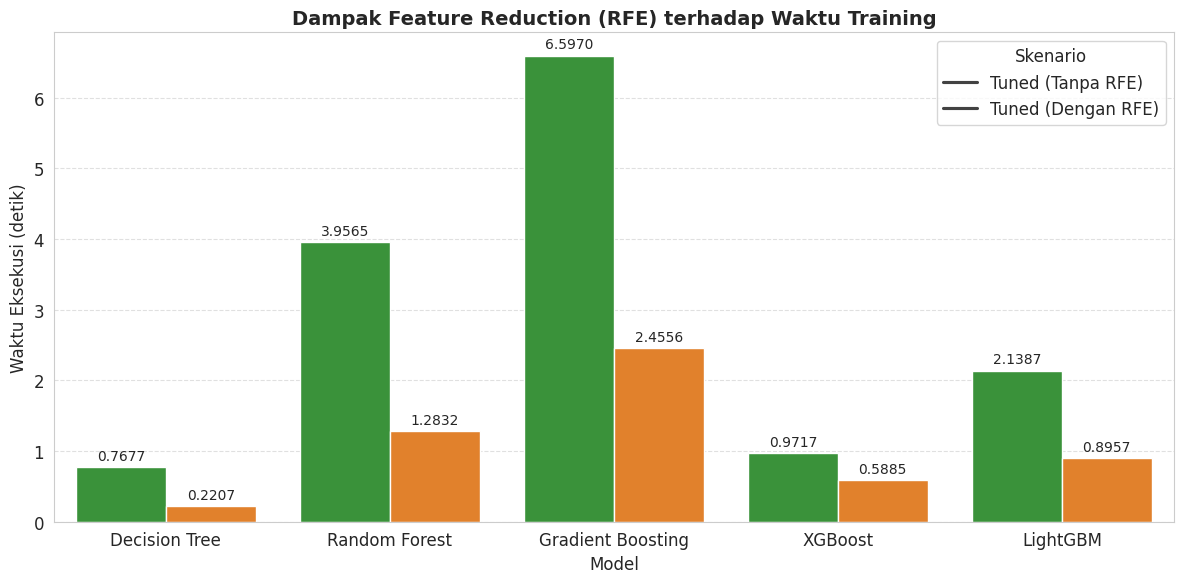

In [ ]:
melted_rfe_compare_df = df_compare_rfe.melt(id_vars='Model', value_vars=['Tuned_Time', 'RFE_Time'], var_name='Scenario', value_name='Time (s)')

plt.figure(figsize=(12, 6))
sns.barplot(data=melted_rfe_compare_df, x='Model', y='Time (s)', hue='Scenario', palette=['#2ca02c', '#ff7f0e'])

plt.title('Dampak Feature Reduction (RFE) terhadap Waktu Training', fontsize=14, fontweight='bold')
plt.ylabel('Waktu Eksekusi (detik)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.legend(title='Skenario', labels=['Tuned (Tanpa RFE)', 'Tuned (Dengan RFE)'])
plt.grid(axis='y', linestyle='--', alpha=0.6)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.4f', padding=3, fontsize=10)

plt.tight_layout()
plt.show()

## K-Fold Cross Validation

## XGBoost

In [ ]:
best_xgboost_model = tuned_models_rfe['XGBoost']

print("=== BEST XGBOOST MODEL SELECTED ===")
print(best_xgboost_model)
print(f"Fitur yang digunakan: {xgb_rfe_features}")

=== BEST XGBOOST MODEL SELECTED ===
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=-1,
              num_parallel_tree=None, ...)
Fitur yang digunakan: ['URLSimilarityIndex', 'IsHTTPS', 'LineOfCode', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmp

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

print("=== MELAKUKAN K-FOLD CROSS VALIDATION PADA MODEL XGBOOST TERBAIK (DENGAN FITUR RFE) ===")

# 1. Pilih model XGBoost terbaik dari skenario 2 (tuned) dan fitur dari skenario 3 (RFE)
best_xgboost_model = tuned_models_rfe["XGBoost"]

# 2. Siapkan Stratified K-Fold Cross Validation
# Menggunakan StratifiedKFold karena dataset mungkin sedikit tidak seimbang
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3. Lakukan Cross Validation
print(f"Melakukan 5-Fold Stratified Cross Validation untuk XGBoost...")
cv_scores = cross_val_score(best_xgboost_model, X_train_rfe_final, y_train, cv=kf, scoring='accuracy', n_jobs=-1)

# 4. Tampilkan Hasil
print("\n=== HASIL K-FOLD CROSS VALIDATION ===")
print("Akurasi untuk setiap fold:")

for i, score in enumerate(cv_scores, start=1):
    print(f"  - Akurasi fold {i}: {score:.6f}")

print(f"Akurasi Rata-rata: {cv_scores.mean():.6f}")
print(f"Standar Deviasi Akurasi: {cv_scores.std():.6f}")


=== MELAKUKAN K-FOLD CROSS VALIDATION PADA MODEL XGBOOST TERBAIK (DENGAN FITUR RFE) ===
Melakukan 5-Fold Stratified Cross Validation untuk XGBoost...

=== HASIL K-FOLD CROSS VALIDATION ===
Akurasi untuk setiap fold:
  - Akurasi fold 1: 1.000000
  - Akurasi fold 2: 1.000000
  - Akurasi fold 3: 0.999970
  - Akurasi fold 4: 1.000000
  - Akurasi fold 5: 1.000000
Akurasi Rata-rata: 0.999994
Standar Deviasi Akurasi: 0.000012


## Random Forest

In [ ]:
best_randomForest_model = tuned_models_rfe['Random Forest']

print("=== BEST RANDOM FOREST MODEL SELECTED ===")
print(best_randomForest_model)
print(f"Fitur yang digunakan: {xgb_rfe_features}")

=== BEST RANDOM FOREST MODEL SELECTED ===
RandomForestClassifier(max_depth=10, n_estimators=20, n_jobs=-1,
                       random_state=42)
Fitur yang digunakan: ['URLSimilarityIndex', 'IsHTTPS', 'LineOfCode', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'TLD_Freq']


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

print("=== MELAKUKAN K-FOLD CROSS VALIDATION PADA MODEL RANDOM FOREST TERBAIK (DENGAN FITUR RFE) ===")

# 2. Siapkan Stratified K-Fold Cross Validation
# Menggunakan StratifiedKFold karena dataset mungkin sedikit tidak seimbang
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3. Lakukan Cross Validation
print(f"Melakukan 5-Fold Stratified Cross Validation untuk Random Forest...")
cv_scores = cross_val_score(best_randomForest_model, X_train_rfe_final, y_train, cv=kf, scoring='accuracy', n_jobs=-1)

# 4. Tampilkan Hasil
print("\n=== HASIL K-FOLD CROSS VALIDATION ===")
print("Akurasi untuk setiap fold:")

for i, score in enumerate(cv_scores, start=1):
    print(f"  - Akurasi fold {i}: {score:.6f}")

print(f"Akurasi Rata-rata: {cv_scores.mean():.6f}")
print(f"Standar Deviasi Akurasi: {cv_scores.std():.6f}")


=== MELAKUKAN K-FOLD CROSS VALIDATION PADA MODEL RANDOM FOREST TERBAIK (DENGAN FITUR RFE) ===
Melakukan 5-Fold Stratified Cross Validation untuk Random Forest...

=== HASIL K-FOLD CROSS VALIDATION ===
Akurasi untuk setiap fold:
  - Akurasi fold 1: 1.000000
  - Akurasi fold 2: 1.000000
  - Akurasi fold 3: 0.999939
  - Akurasi fold 4: 1.000000
  - Akurasi fold 5: 1.000000
Akurasi Rata-rata: 0.999988
Standar Deviasi Akurasi: 0.000024
